# Fil rouge project - G7 Amazon Reviews for Sentiment Analysis

Group members are:

*   ETU20231137 Chia-shuo YANG
*   ETU20231136 Maximilian SOMMERFELD
*   ETU20231057 Chia-chi CHEN
*   ETU20230394 Merearii LI


#*Code Disclaimer*


*   Training on Server for running the code (we use the server since the limited capacity of the RAM we had in our google colab and CPU)
*   Libraries which are used multiple times are imported in the Environment section. Single use libraries can be found inside the respective section.
*   The training and testing datasets are given by Kaggle as separate files.
*   We created several files, which document the changes we have done to the original data set, during the course of the project. They will be reused inside the code. We include these CSV files in the following, as they are to big to upload in moodle: [LINK](https://drive.google.com/drive/folders/1FEunIR6UHx2IsjEP4vhsU67-vaZKAzpW)





#*Project introduction*
- Prelabeled datasets consisting of > 4 mill. customer Reviews on differentAmazon products provided on: [Kaggle](https://www.kaggle.com/datasets/bittlingmayer/amazonreviews)

 - Labels : 0 and 1

    - Label 0 : Good Comment (4- and 5-star reviews)
    - Label 1  : Bad Comment (1- and 2-star reviews)

 - 3-star reviews are considered neutral so we don’t analyze them.
 - Data is already split in training and test data


- Goal: Creating a well performing model to predict Good and Bad comments


# **Table of Contents**

1.   Environment
2.   Loading the data
3.   Data description
4.   Data cleaning
5.   Exploratory data analysis
6.   Feature engineering
7.   Data split (train, validation, test)
8.   Tokenize data for NLP
9.   Model building - Model 1
10.  Model building - Model 2 (better result)
11.  Evaluation of training and validation set
12.  Evaluation and result




# <font color="red">  **Part 1**

# **1.  Environment**




---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import re

# import the pak of drawing graph
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from PIL import Image
from collections import Counter
import seaborn as sns

# import the NLP model for making sentimental column
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# **2.   Loading the data**


---



In [ ]:
#Loading the raw data
path_n = '/content/drive/MyDrive/'
path_train = path_n + '/01_fil_rouge_project_files/01_Dataset/01_P14_Amazon Reviews for Sentiment Analysis/train.ft.txt'
path_test = path_n + '/01_fil_rouge_project_files/01_Dataset/01_P14_Amazon Reviews for Sentiment Analysis/test.ft2.txt'

In [ ]:
# define Function to read txtfile
def process_txtfile(path):
    data_label, title, comment = [], [], []

    with open(path, 'r') as file:
        lines = file.readlines()

    for line in tqdm(lines):
        i = line.index(':')
        data_label.append(line.split('__label__')[1][0])
        title.append(line.split('__label__')[1][1:i - 8])
        comment.append(line.split('__label__')[1][i - 8:])

    df = pd.DataFrame(list(zip(data_label, title, comment)), columns=['data_label', 'title', 'comment'])
    return df

In [ ]:
df_train = process_txtfile(path_train)
df_train

100%|██████████| 3600000/3600000 [00:07<00:00, 501467.42it/s]


data_label                                              title  \
0                2                    Stuning even for the non-gamer:   
1                2             The best soundtrack ever to anything.:   
2                2                                          Amazing!:   
3                2                              Excellent Soundtrack:   
4                2   Remember, Pull Your Jaw Off The Floor After H...   
...            ...                                                ...   
3599995          1                                     Don't do it!!:   
3599996          1                     Looks nice, low functionality:   
3599997          1                        compact, but hard to clean:   
3599998          1                                what is it saying?:   
3599999          2             Makes My Blood Run Red-White-And-Blue:   

                                                   comment  
0         This sound track was beautiful! It paints the...  
1         I'm reading a lot of reviews saying that this...  
2         This soundtrack is my favorite music of all t...  
3         I truly like this soundtrack and I enjoy vide...  
4         If you've played the game, you know how divin...  
...                                                    ...  
3599995   The high chair looks great when it first come...  
3599996   I have used this highchair for 2 kids now and...  
3599997   We have a small house, and really wanted two ...  
3599998   not sure what this book is supposed to be. It...  
3599999   I agree that every American should read this ...  

[3600000 rows x 3 columns]

In [ ]:
df_test = process_txtfile(path_test)
df_test

100%|██████████| 400000/400000 [00:00<00:00, 671947.66it/s]


data_label                                              title  \
0               2                                          Great CD:   
1               2   One of the best game music soundtracks - for ...   
2               1                  Batteries died within a year ...:   
3               2             works fine, but Maha Energy is better:   
4               2                      Great for the non-audiophile:   
...           ...                                                ...   
399995          1                        Unbelievable- In a Bad Way:   
399996          1                   Almost Great, Until it Broke...:   
399997          1                                  Disappointed !!!:   
399998          2                           Classic Jessica Mitford:   
399999          1                       Comedy Scene, and Not Heard:   

                                                  comment  
0        My lovely Pat has one of the GREAT voices of ...  
1        Despite the fact that I have only played a sm...  
2        I bought this charger in Jul 2003 and it work...  
3        Check out Maha Energy's website. Their Powere...  
4        Reviewed quite a bit of the combo players and...  
...                                                   ...  
399995   We bought this Thomas for our son who is a hu...  
399996   My son recieved this as a birthday gift 2 mon...  
399997   I bought this toy for my son who loves the "T...  
399998   This is a compilation of a wide range of Mitf...  
399999   This DVD will be a disappointment if you get ...  

[400000 rows x 3 columns]

#**3.   Data description**


In [ ]:
# Read cleaned data
path_train_c = path_n + '/01_fil_rouge_project_files/01_Dataset/01_P14_Amazon Reviews for Sentiment Analysis/df_amazon_train_clean.csv'
path_test_c = path_n + '/01_fil_rouge_project_files/01_Dataset/01_P14_Amazon Reviews for Sentiment Analysis/df_amazon_test_clean.csv'

In [ ]:
# 0: means "Good comment"
# 1: means "Bad comment"

def process_dataframe(df):
    df['comments'] = df['title'] + '. ' + df['comment']
    df = df.drop(['title', 'comment'], axis=1)
    df['data_label'] = df['data_label'].replace(2, 0)
    return df

In [ ]:
# Assuming you have df_train and df_test DataFrames
df_train = process_dataframe(df_train)
print(df_train)

        data_label                                           comments
0                2   Stuning even for the non-gamer:.  This sound ...
1                2   The best soundtrack ever to anything.:.  I'm ...
2                2   Amazing!:.  This soundtrack is my favorite mu...
3                2   Excellent Soundtrack:.  I truly like this sou...
4                2   Remember, Pull Your Jaw Off The Floor After H...
...            ...                                                ...
3599995          1   Don't do it!!:.  The high chair looks great w...
3599996          1   Looks nice, low functionality:.  I have used ...
3599997          1   compact, but hard to clean:.  We have a small...
3599998          1   what is it saying?:.  not sure what this book...
3599999          2   Makes My Blood Run Red-White-And-Blue:.  I ag...

[3600000 rows x 2 columns]


In [ ]:
# Assuming you have df_train and df_test DataFrames
df_test = process_dataframe(df_test)
print(df_test)

       data_label                                           comments
0               2   Great CD:.  My lovely Pat has one of the GREA...
1               2   One of the best game music soundtracks - for ...
2               1   Batteries died within a year ...:.  I bought ...
3               2   works fine, but Maha Energy is better:.  Chec...
4               2   Great for the non-audiophile:.  Reviewed quit...
...           ...                                                ...
399995          1   Unbelievable- In a Bad Way:.  We bought this ...
399996          1   Almost Great, Until it Broke...:.  My son rec...
399997          1   Disappointed !!!:.  I bought this toy for my ...
399998          2   Classic Jessica Mitford:.  This is a compilat...
399999          1   Comedy Scene, and Not Heard:.  This DVD will ...

[400000 rows x 2 columns]


## 3.1 Counting the number of the positive/ negative reviews


### Training data

In [ ]:
positive_reviews = df_train[df_train['data_label'] == "2"]
negative_reviews = df_train[df_train['data_label'] == "1"]

num_positive_reviews = positive_reviews.shape[0]
num_negative_reviews = negative_reviews.shape[0]

In [ ]:
# count the number of each
print("Number of __positive__ reviews:", num_positive_reviews)
print("Number of __negative__ reviews:", num_negative_reviews)

Number of __positive__ reviews: 0
Number of __negative__ reviews: 0


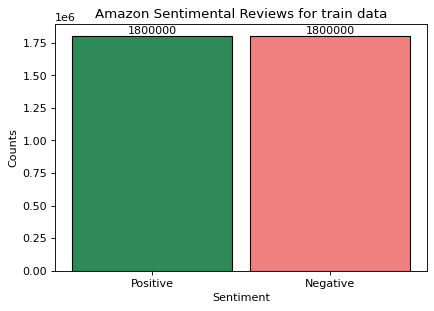

In [ ]:
categories = ['Positive', 'Negative']
counts = [num_positive_reviews, num_negative_reviews]

#preference of the figure
plt.figure(figsize = (6, 4), dpi = 80)
bar = plt.bar(categories, counts, width=0.9, edgecolor='black', linewidth = 1, color=['SeaGreen', 'LightCoral'])

# Add labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.title('Amazon Sentimental Reviews for train data')
plt.show()

### Testing data

In [ ]:
positive_reviews_tst = df_test[df_test['data_label'] == "2"]
negative_reviews_tst = df_test[df_test['data_label'] == "1"]

num_positive_reviews_tst = positive_reviews_tst.shape[0]
num_negative_reviews_tst = negative_reviews_tst.shape[0]

In [ ]:
# count the number of each
print("Number of __positive__ reviews:", num_positive_reviews_tst)
print("Number of __negative__ reviews:", num_negative_reviews_tst)

Number of __positive__ reviews: 200000
Number of __negative__ reviews: 200000


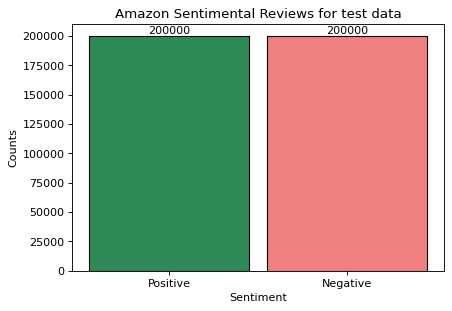

In [ ]:
categories = ['Positive', 'Negative']
counts = [num_positive_reviews_tst, num_negative_reviews_tst]

#preference of the figure
plt.figure(figsize = (6, 4), dpi = 80)
bar = plt.bar(categories, counts, width=0.9, edgecolor='black', linewidth = 1, color=['SeaGreen', 'LightCoral'])

# Add labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.title('Amazon Sentimental Reviews for test data')
plt.show()

 <font color="blue"> Through our plots of the training and testing dataset, we can see that the positive and Negative comments are equally distributed

## 3.2 Text length

### Training data

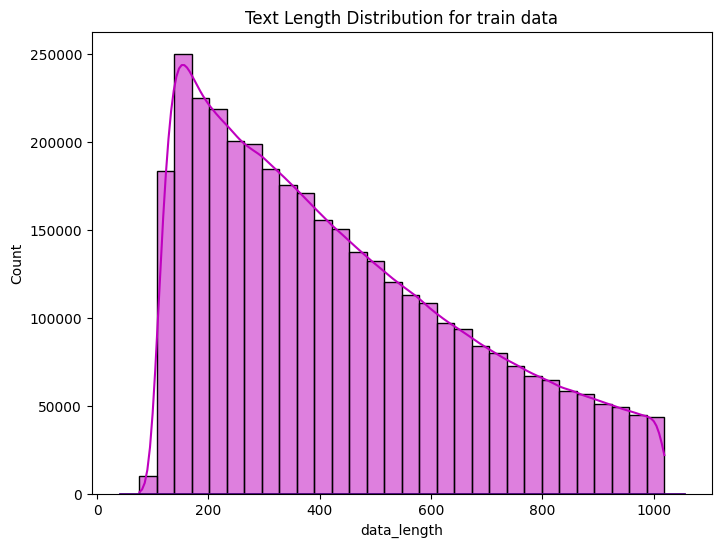

In [ ]:
# draw the histograms
# text length distribution
df_train['data_length'] = df_train['comments'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(df_train['data_length'], kde=True, color = "m", stat = "count", bins = 30)

#set color for the KDE line
sns.kdeplot(df_train['data_length'], color="indigo", linewidth = 2)

plt.title("Text Length Distribution for train data")
plt.show()

### Testing data

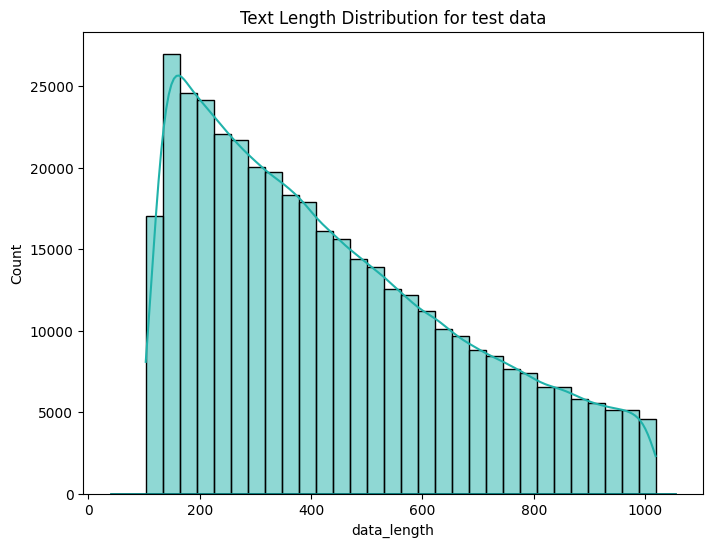

In [ ]:
# draw the histograms
# text length distribution
df_test['data_length'] = df_test['comments'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(df_test['data_length'], kde=True, color = "lightseagreen", stat = "count", bins = 30)

#set color for the KDE line
sns.kdeplot(df_train['data_length'], color="teal", linewidth = 2)

plt.title("Text Length Distribution for test data")
plt.show()

 <font color="blue"> The text length of training and testing data, we can see that they have the same result, 180 data length is the majority






## 3.3 Language Distribution

### 3.3.1 Pie chart

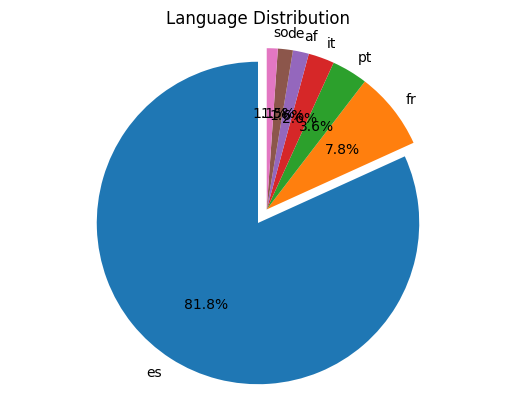

In [ ]:
# Language distribution data except english
labels = ['es', 'fr', 'pt', 'it', 'af', 'de', 'so']
sizes = [81.7, 7.8, 3.6, 2.6, 1.6, 1.5, 1.1]
explode = [0.1 if lang == 'es' else 0 for lang in labels]  # Shift 'es' out of the pie chart

# Plotting the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the plot
plt.title('Language Distribution')
plt.show()


#### Training data


In [ ]:
#load the dataset for language_train
path_train_l = path_n + '/01_fil_rouge_project_files/01_Dataset/01_P14_Amazon Reviews for Sentiment Analysis/dataset_1030/df_amazon_train_langu_1029.csv'

df_train_l = pd.read_csv(path_train_l)
print(df_train_l)

         data_label                                           comments  \
0                 0   stuning even for the nongamer   this sound tr...   
1                 0   the best soundtrack ever to anything   im rea...   
2                 0   amazing   this soundtrack is my favorite musi...   
3                 0   excellent soundtrack   i truly like this soun...   
4                 0   remember pull your jaw off the floor after he...   
...             ...                                                ...   
3599995           1   dont do it   the high chair looks great when ...   
3599996           1   looks nice low functionality   i have used th...   
3599997           1   compact but hard to clean   we have a small h...   
3599998           1   what is it saying   not sure what this book i...   
3599999           0   makes my blood run redwhiteandblue   i agree ...   

        detected_language  
0                      en  
1                      en  
2                      en  

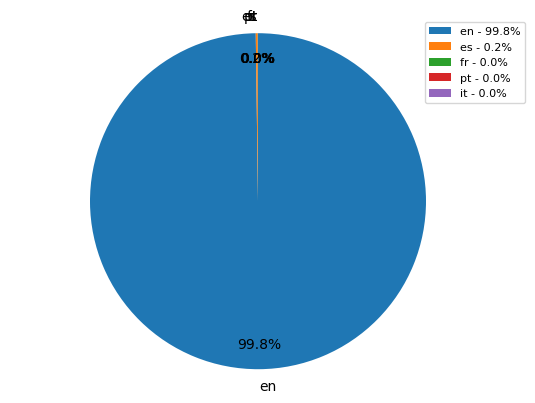

In [ ]:
# Calculate language distribution for all languages
language_distribution_tr = df_train_l['detected_language'].value_counts()

# Select the top five languages
top_five_languages_tr = language_distribution_tr.head(5)

# Plot a pie chart for the top five languages
fig, ax = plt.subplots()
patches, texts, autotexts = ax.pie(top_five_languages_tr, labels=top_five_languages_tr.index, autopct='%1.1f%%', startangle=90, counterclock=False, pctdistance=0.85)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add legend with percentages for the top five languages
percentages = ['{0:.1f}%'.format(100.0 * value / sum(top_five_languages_tr)) for value in top_five_languages_tr]
labels = [f'{label} - {percentage}' for label, percentage in zip(top_five_languages_tr.index, percentages)]
ax.legend(patches, labels, loc='upper right', bbox_to_anchor=(1.05, 1), fontsize=8)

# Display the plot
plt.show()

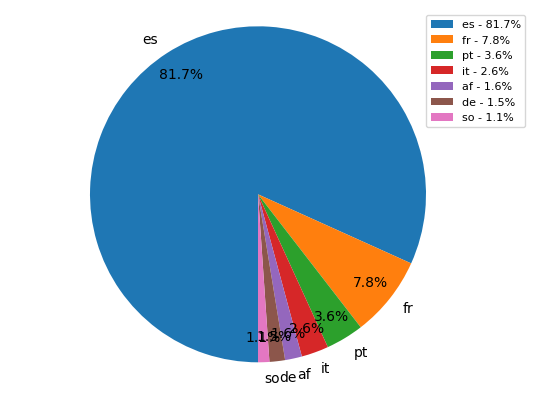

In [ ]:
# Except english, to see the percentage of other languages
# Filter out English language
df_train_non_english = df_train_l[df_train_l['detected_language'] != 'en']

# Calculate language distribution for non-English languages
language_distribution_non_english_tr = df_train_non_english['detected_language'].value_counts()

# Select the top seven non-English languages
top_seven_non_english_languages = language_distribution_non_english_tr.head(7)

# Sort the languages by percentage in descending order
sorted_languages = top_seven_non_english_languages.sort_values(ascending=False)

# Plot a pie chart for the top seven non-English languages
fig, ax = plt.subplots()
patches, texts, autotexts = ax.pie(sorted_languages, labels=sorted_languages.index, autopct='%1.1f%%', startangle=270, counterclock=False, pctdistance=0.85)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add legend with percentages for the top seven non-English languages in the upper right
percentages = ['{0:.1f}%'.format(100.0 * value / sum(sorted_languages)) for value in sorted_languages]
labels = [f'{label} - {percentage}' for label, percentage in zip(sorted_languages.index, percentages)]
ax.legend(patches, labels, loc='upper right', bbox_to_anchor=(1.05, 1), fontsize=8)

# Display the plot
plt.show()

#### Testing data

In [ ]:
#load the dataset for language_test
path_test_l = path_n + '/01_fil_rouge_project_files/01_Dataset/01_P14_Amazon Reviews for Sentiment Analysis/dataset_1030/df_amazon_test_langu_1029.csv'

df_test_l = pd.read_csv(path_test_l)
print(df_test_l)

        data_label                                           comments  \
0                0   great cd   my lovely pat has one of the great...   
1                0   one of the best game music soundtracks  for a...   
2                1   batteries died within a year    i bought this...   
3                0   works fine but maha energy is better   check ...   
4                0   great for the nonaudiophile   reviewed quite ...   
...            ...                                                ...   
399995           1   unbelievable in a bad way   we bought this th...   
399996           1   almost great until it broke   my son recieved...   
399997           1   disappointed    i bought this toy for my son ...   
399998           0   classic jessica mitford   this is a compilati...   
399999           1   comedy scene and not heard   this dvd will be...   

       detected_language  
0                     en  
1                     en  
2                     en  
3              

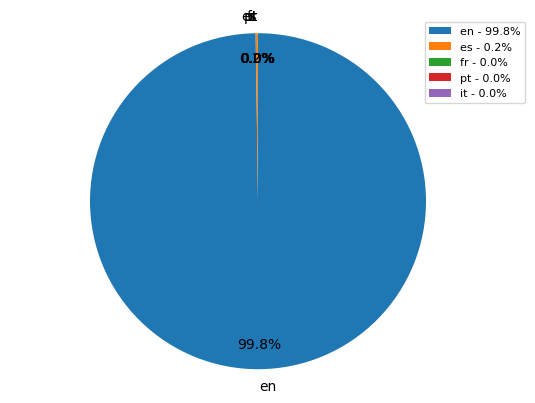

In [ ]:
# Calculate language distribution for all languages
language_distribution_te = df_test_l['detected_language'].value_counts()

# Select the top five languages
top_five_languages_te = language_distribution_te.head(5)

# Plot a pie chart for the top five languages
fig, ax = plt.subplots()
patches, texts, autotexts = ax.pie(top_five_languages_te, labels=top_five_languages_te.index,
                                   autopct='%1.1f%%', startangle=90, counterclock=False, pctdistance=0.85)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add legend with percentages for the top five languages
percentages = ['{0:.1f}%'.format(100.0 * value / sum(top_five_languages_te)) for value in top_five_languages_te]
labels = [f'{label} - {percentage}' for label, percentage in zip(top_five_languages_te.index, percentages)]
ax.legend(patches, labels, loc='upper right', bbox_to_anchor=(1.05, 1), fontsize=8)

# Display the plot
plt.show()

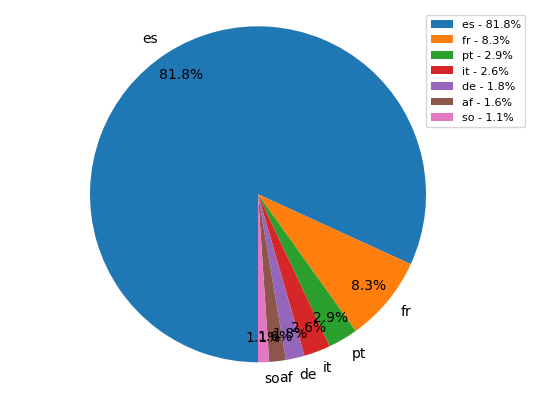

In [ ]:
# Except english, to see the percentage of other languages
# Filter out english language
df_test_non_english = df_test_l[df_test_l['detected_language'] != 'en']

# Calculate language distribution for non-English languages in the test data
language_distribution_non_english_test = df_test_non_english['detected_language'].value_counts()

# Select the top seven non-English languages
top_seven_non_english_languages_test = language_distribution_non_english_test.head(7)

# Sort the languages by percentage in descending order
sorted_languages_test = top_seven_non_english_languages_test.sort_values(ascending=False)

# Plot a pie chart for the top seven non-English languages in the test data
fig, ax = plt.subplots()
patches, texts, autotexts = ax.pie(sorted_languages_test, labels=sorted_languages_test.index, autopct='%1.1f%%', startangle=270, counterclock=False, pctdistance=0.85)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add legend with percentages for the top seven non-English languages in the test data in the upper right
percentages_test = ['{0:.1f}%'.format(100.0 * value / sum(sorted_languages_test)) for value in sorted_languages_test]
labels_test = [f'{label} - {percentage}' for label, percentage in zip(sorted_languages_test.index, percentages_test)]
ax.legend(patches, labels_test, loc='upper right', bbox_to_anchor=(1.05, 1), fontsize=8)

# Display the plot
plt.show()

### 3.3.2 Bar chart
The bar chart is using the cleaned data to show the distribution after cleaning is the same

In [ ]:
# Read the lemmetized data
path_train_le = path_n + '/01_Dataset/01_P14_Amazon Reviews for Sentiment Analysis/lemmatized_data/df_train_clean_sw_lemmatized_wlist_en_1110.csv'

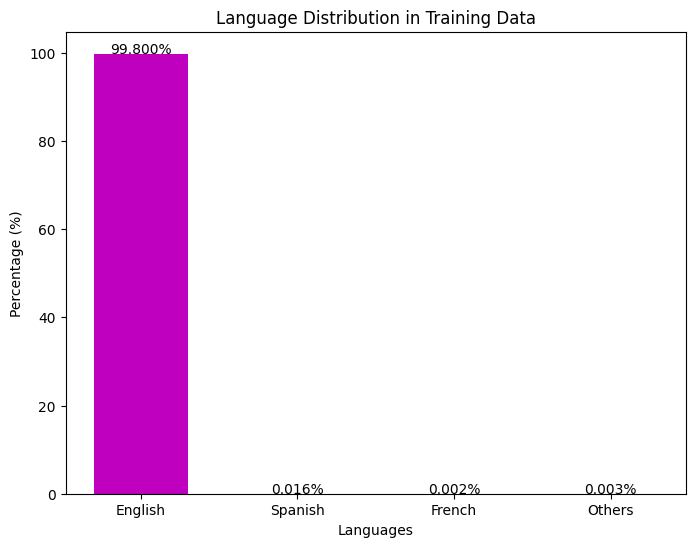

In [ ]:
#the percentage are calculated based on the file "path_train_le" mentioned above, to ensure the execution, we directly put the numbers after calculation
language_list = ["English", "Spanish", "French", "Others"]
train_lang_percentage = [99.8, 0.016, 0.0015, 0.0025]

# Plotting the bar chart with thinner bars
plt.figure(figsize=(8, 6))
plt.bar(language_list, train_lang_percentage, color=["m"], width=0.6)
plt.title('Language Distribution in Training Data')
plt.xlabel('Languages')
plt.ylabel('Percentage (%)')

# Display the percentage values on top of the bars
for i, percentage in enumerate(train_lang_percentage):
    plt.text(i, percentage + 0.1, f"{percentage:.3f}%", ha='center')

plt.show()

 <font color="blue"> Through the pie and bar chart, we can see that the data for testing and training have similar percentage of each language, with english being the dominating langauage

## 3.4 Word Cloud

### 3.4.1 Before cleaning

#### Training data

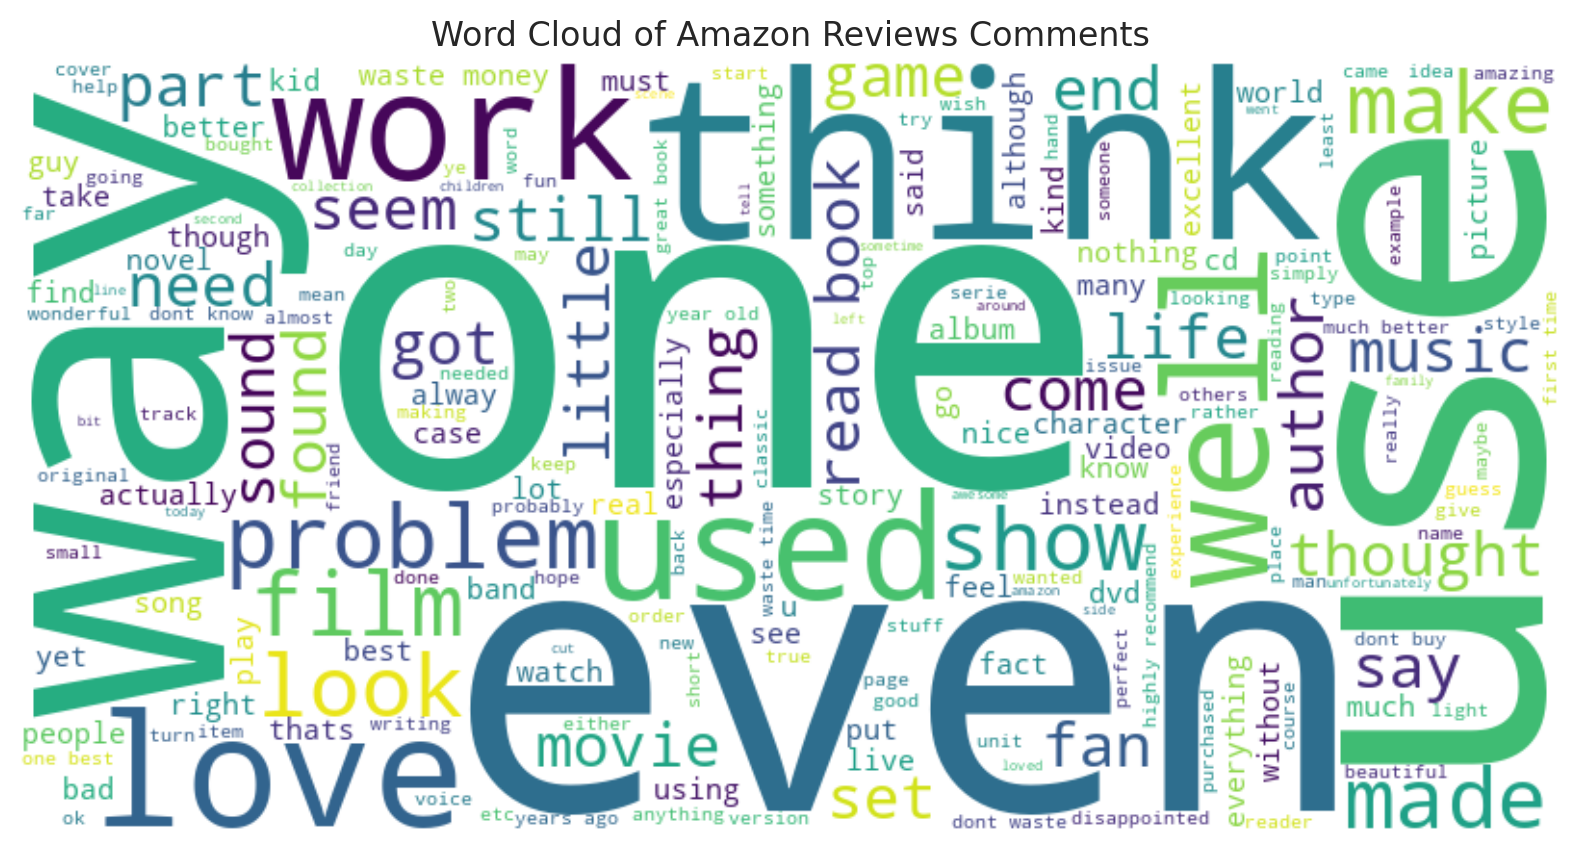

In [ ]:
# we're using the df_train raw dataset for this wordcloud, but it'll take too much time to run, therefore, we inserted the photo of the wordcloud below
# label 0 + 1
# Read DataFrame 'df_train'
comments = df_train['comments']

# Combine all the comments into a single string
all_comments = " ".join(comment for comment in comments)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Create a figure and display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Amazon Reviews Comments")
plt.show()

### 3.4.2 After cleaning

#### Training data

In [ ]:
# read data
path_n = '/content/drive/MyDrive/01_fil_rouge_project_files'

path_train_c = path_n + '/01_Dataset/01_P14_Amazon Reviews for Sentiment Analysis/lemmatized_data/word_counts_train_sw_lemmatized_en_1110.csv'

In [ ]:
df_train_p = pd.read_csv(path_train_c)
print(df_train_p)

               Unnamed: 0  word_count_train  word_count_train_0  \
0                    stun              1894              1232.0   
1                    even            496953            181494.0   
2                nongamer                48                40.0   
3                   sound            288829            136286.0   
4                   track            122498             75994.0   
...                   ...               ...                 ...   
2050066    enslavedperhap                 1                 NaN   
2050067         spacewize                 1                 NaN   
2050068           bibsthe                 1                 NaN   
2050069      penetrationi                 1                 NaN   
2050070  redwhiteandbluer                 1                 1.0   

         word_count_train_1  
0                     662.0  
1                  315459.0  
2                       8.0  
3                  152543.0  
4                   46504.0  
...            

##### Positive

In [ ]:
# Rename the first column to 'word'
df_train_p = df_train_p.rename(columns={'Unnamed: 0': 'word_pos'})

# Calculate the difference between the two columns
df_train_p['diff_pos'] = df_train_p['word_count_train_0'] - df_train_p['word_count_train_1']

# Sort the DataFrame in descending order based on the 'diff_pos' column
df_train_p = df_train_p.sort_values(by='diff_pos', ascending=False)

# If you want to reset the index after sorting
df_train_p = df_train_p.reset_index(drop=True)

# Display the updated DataFrame
print(df_train_p)

                 word_pos  word_count_train  word_count_train_0  \
0                   great           1095329            846585.0   
1                    good           1355746            849639.0   
2                    love            662139            502128.0   
3               excellent            183132            159600.0   
4                    easy            231685            179046.0   
...                   ...               ...                 ...   
2050066    enslavedperhap                 1                 NaN   
2050067         spacewize                 1                 NaN   
2050068           bibsthe                 1                 NaN   
2050069      penetrationi                 1                 NaN   
2050070  redwhiteandbluer                 1                 1.0   

         word_count_train_1  diff_pos  
0                  248744.0  597841.0  
1                  506107.0  343532.0  
2                  160011.0  342117.0  
3                   23532.0  136068

In [ ]:
# install the package for creating the image for wordcloud
import PIL.Image
from PIL import Image

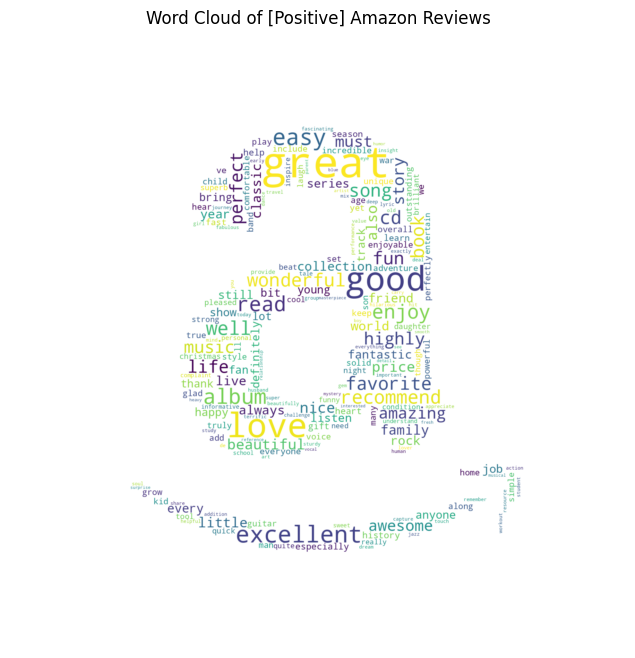

In [ ]:
# Create a dictionary from 'word_pos' and 'diff_pos' columns
word_count_dict_p = dict(zip(df_train_p['word_pos'], df_train_p['diff_pos']))

# Load the Amazon logo image
amazon_logo = np.array(PIL.Image.open("/content/drive/MyDrive/01_fil_rouge_project_files/Lorie/amazon_logo.jpeg"))

# Generate the word cloud
wordcloud_p = WordCloud(width=600, height=300, mask=amazon_logo, background_color='white').generate_from_frequencies(word_count_dict_p)

# Create a figure and display the word cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_p, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of [Positive] Amazon Reviews")
plt.show()

##### Negative

In [ ]:
# Rename the first column to 'word'
df_train_n = df_train_p.rename(columns={'Unnamed: 0': 'word_neg'})

# Calculate the difference between the two columns
df_train_n['diff_neg'] = df_train_n['word_count_train_1'] - df_train_n['word_count_train_0']

# Sort the DataFrame in descending order based on the 'diff_pos' column
df_train_n = df_train_n.sort_values(by='diff_neg', ascending=False)

# If you want to reset the index after sorting
df_train_n = df_train_n.reset_index(drop=True)

# Display the updated DataFrame
print(df_train_n)

                 word_pos  word_count_train  word_count_train_0  \
0                     not           2094383            740211.0   
1                      do           1233414            419097.0   
2                     bad            427055             72203.0   
3                   would            912583            338767.0   
4                     buy            889635            333378.0   
...                   ...               ...                 ...   
2050066    enslavedperhap                 1                 NaN   
2050067         spacewize                 1                 NaN   
2050068           bibsthe                 1                 NaN   
2050069      penetrationi                 1                 NaN   
2050070  redwhiteandbluer                 1                 1.0   

         word_count_train_1  diff_pos  diff_neg  
0                 1354172.0 -613961.0  613961.0  
1                  814317.0 -395220.0  395220.0  
2                  354852.0 -282649.0  282649

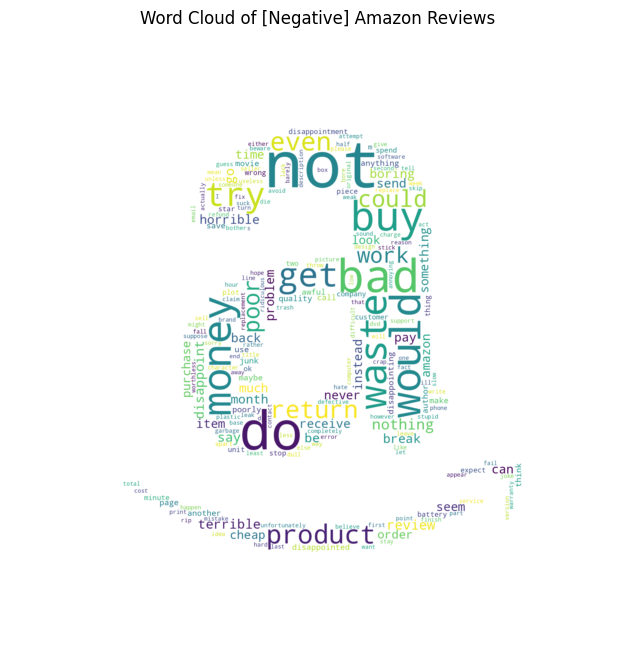

In [ ]:
# Create a dictionary from 'word_pos' and 'diff_pos' columns
word_count_dict_n = dict(zip(df_train_n['word_pos'], df_train_n['diff_neg']))

# Load the Amazon logo image
amazon_logo = np.array(PIL.Image.open("/content/drive/MyDrive/01_fil_rouge_project_files/Lorie/amazon_logo.jpeg"))

# Generate the word cloud
wordcloud_n = WordCloud(width=600, height=300, mask=amazon_logo, background_color='white').generate_from_frequencies(word_count_dict_n)

# Create a figure and display the word cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_n, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of [Negative] Amazon Reviews")
plt.show()

</color>

 <font color="blue"> By using the wordclouds, we can see the specific words appearing most often in the positive and negative comments

#**4.   Data cleaning**

We first define the three functions (noise removal, word lemmatization, stopwords removal), than apply the functions.

## 4.1 Remove the noise

  - Check if the values are of type str

  - Remove characters that are not letters, digits, or whitespace

  - Replace consecutive spaces at the beginning with a single space

  - Remove emails using regex

  - Remove URLs using regex

  - Remove forward and backward slashes
    

In [ ]:
#dictionary `contractions` to replace all the short text values with their corresponding the expanded values

contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [ ]:
def clean_data(dataset, n_start, n_end):

    # Assuming you have a DataFrame, you can clean text in a specific column (e.g., column 10) as follows:
    data = dataset.iloc[:, n_start : n_end]

    # Check if the values are of type str
    data = data.apply(lambda x: x.lower() if isinstance(x, str) else x)

    def replace_contractions(text):
        for key, value in contractions.items():
            text = text.replace(key, value)
        return text

    data = data.apply(replace_contractions)

    # Remove characters that are not letters, digits, or whitespace
    data = data.replace(r'[^a-zA-Z0-9\s]', ' ', regex=True)

    # Replace consecutive spaces at the beginning with a single space
    data = data.replace(r'^\s+', ' ', regex=True)

    # Remove emails using regex
    data = data.replace(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', regex=True)

    # Remove URLs using regex
    data = data.replace(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', regex=True)

    # Remove forward and backward slashes
    data = data.replace(r'[^a-zA-Z0-9\s/\\]', ' ', regex=True)

    dataset.iloc[:, n_start:n_end] = data

    return dataset

## 4.2 Word lemmatized

  - Remove all numbers from comments

  - Remove consecutive repeated characters (three or more times)

  - Lemmatize the words

In [ ]:
import spacy

In [ ]:
def word_lemmatized(df):

  df.dropna(inplace=True)
  print(df.isnull().sum())

  # Remove all numbers from comments
  df['comments'] = df['comments'].apply(lambda x: re.sub(r'\d+', '', x))

  # Remove consecutive repeated characters (three or more times)
  df['comments'] = df['comments'].apply(lambda x: re.sub(r'(.)\1{2,}', r'\1', x))

  # Load the spaCy English language model
  nlp = spacy.load("en_core_web_sm")

  # Assuming you have a DataFrame named 'df'
  df['comments_lemmatized'] = df['comments'].apply(lambda x: ' '.join([token.lemma_ for token in nlp(x)]))

  # Display the DataFrame with the added 'comments_lemmatized' column
  print(df)

  return df

## 4.3 Remove stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
# Download the stopwords dataset (you need to do this once)
nltk.download('stopwords')

# Define a function to remove stopwords from a given text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))  # Set of English stopwords
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 4.4 Apply functions
Applying the function to the dataset takes long time, so we also inserted a photo of the printed dataframe below, then we read a new dataset directly

In [ ]:
df_train = clean_data(df_train, 1, 2)
df_train_clean = word_lemmatized(df_train)
df_train_clean['comments'] = df_train_clean['comments'].apply(remove_stopwords)
df_train_clean

data_label                                           comments
0                 0   stuning even for the nongamer   this sound tr...
1                 0   the best soundtrack ever to anything   im rea...
2                 0   amazing   this soundtrack is my favorite musi...
3                 0   excellent soundtrack   i truly like this soun...
4                 0   remember pull your jaw off the floor after he...
...             ...                                                ...
3599995           1   dont do it   the high chair looks great when ...
3599996           1   looks nice low functionality   i have used th...
3599997           1   compact but hard to clean   we have a small h...
3599998           1   what is it saying   not sure what this book i...
3599999           0   makes my blood run redwhiteandblue   i agree ...

[3600000 rows x 2 columns]

In [ ]:
df_test = clean_data(df_test, 1, 2)
df_test_clean = word_lemmatized(df_test)
df_test_clean['comments'] = df_test_clean['comments'].apply(remove_stopwords)
df_test_clean

data_label                                           comments
0                0   great cd   my lovely pat has one of the great...
1                0   one of the best game music soundtracks  for a...
2                1   batteries died within a year    i bought this...
3                0   works fine but maha energy is better   check ...
4                0   great for the nonaudiophile   reviewed quite ...
...            ...                                                ...
399995           1   unbelievable in a bad way   we bought this th...
399996           1   almost great until it broke   my son recieved...
399997           1   disappointed    i bought this toy for my son ...
399998           0   classic jessica mitford   this is a compilati...
399999           1   comedy scene and not heard   this dvd will be...

[400000 rows x 2 columns]

#**5.   Exploratory data analysis**

## 5.1 Word frequencies counts

In [ ]:
def count_word_frequencies(df, i_name, col_name):
    # Assuming you have a DataFrame named 'df' with a 'comments' column
    df.dropna(inplace = True)
    comments = df[i_name]

    # Tokenize the comments into words
    words = " ".join(comments).split()

    # Count the frequency of each word
    word_counts = Counter(words)

    # Create a DataFrame from word_counts
    word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['word_count'])

    word_counts_df.rename(columns={'word_count': col_name}, inplace=True)

    # Display the total word count and word frequency
    total_word_count = len(words)
    unique_word_count = len(word_counts)

    print("Total word count:", total_word_count)
    print("Unique word count:", unique_word_count)

    return word_counts_df


## 5.2 Language detect

In [ ]:
!pip install langdetect
from langdetect import detect

In [ ]:
def detect_languages_and_count(df):
    # Assuming you have a DataFrame with a 'comments' column
    comments = df['comments']

    # Create a list to store the detected languages
    detected_languages = []

    # Iterate through the comments and detect the language
    for comment in comments:
        try:
            language = detect(comment)
            detected_languages.append(language)
        except Exception as e:
            detected_languages.append("Unknown")  # Handle potential exceptions

    # Add the detected languages to the DataFrame as a new column
    df['detected_language'] = detected_languages

    # Save the DataFrame to a new CSV file if needed
    df.to_csv('df_with_language.csv', index=False)

    # Print the first few rows of the DataFrame to see the results
    print(df)

    # Get unique counts of detected languages
    unique_counts = df['detected_language'].value_counts()

    # Print the unique items and their counts
    print(unique_counts)

    return df

In [ ]:
# detecting the language from the raw dataframe
word_counts_df_train = count_word_frequencies(df_train, 'comments_lemmatized', 'word_count_train')
word_counts_df_train_0 = count_word_frequencies(df_train[df_train['data_label'] == 0 ], 'comments_lemmatized', 'word_count_train_0')
word_counts_df_train_1 = count_word_frequencies(df_train[df_train['data_label'] == 1 ], 'comments_lemmatized', 'word_count_train_1')

# Concatenate word_counts_df1 and word_counts_df by the same words
combined_word_counts_train = pd.concat([word_counts_df_train, word_counts_df_train_0, word_counts_df_train_1], axis=1, sort=False)
combined_word_counts_train

word_counts_df_test = count_word_frequencies(df_test, 'comments_lemmatized', 'word_count_test')
word_counts_df_test_0 = count_word_frequencies(df_test[df_test['data_label'] == 0 ], 'comments_lemmatized', 'word_count_test_0')
word_counts_df_test_1 = count_word_frequencies(df_test[df_test['data_label'] == 1 ], 'comments_lemmatized', 'word_count_test_1')

# Concatenate word_counts_df1 and word_counts_df by the same words
combined_word_counts_test = pd.concat([word_counts_df_test, word_counts_df_test_0, word_counts_df_test_1], axis=1, sort=False)
combined_word_counts_test

In [ ]:
detect_languages_and_count(df_train_clean)

         data_label                                           comments  \
0                 0   stuning even for the nongamer   this sound tr...   
1                 0   the best soundtrack ever to anything   im rea...   
2                 0   amazing   this soundtrack is my favorite musi...   
3                 0   excellent soundtrack   i truly like this soun...   
4                 0   remember pull your jaw off the floor after he...   
...             ...                                                ...   
3599995           1   dont do it   the high chair looks great when ...   
3599996           1   looks nice low functionality   i have used th...   
3599997           1   compact but hard to clean   we have a small h...   
3599998           1   what is it saying   not sure what this book i...   
3599999           0   makes my blood run redwhiteandblue   i agree ...   

        detected_language  
0                      en  
1                      en  
2                      en  

In [ ]:
detect_languages_and_count(df_test_clean)

        data_label                                           comments  \
0                0   great cd   my lovely pat has one of the great...   
1                0   one of the best game music soundtracks  for a...   
2                1   batteries died within a year    i bought this...   
3                0   works fine but maha energy is better   check ...   
4                0   great for the nonaudiophile   reviewed quite ...   
...            ...                                                ...   
399995           1   unbelievable in a bad way   we bought this th...   
399996           1   almost great until it broke   my son recieved...   
399997           1   disappointed    i bought this toy for my son ...   
399998           0   classic jessica mitford   this is a compilati...   
399999           1   comedy scene and not heard   this dvd will be...   

       detected_language  
0                     en  
1                     en  
2                     en  
3              

In [ ]:
df_train_clean

data_label                                           comments  \
0                 0   stuning even for the nongamer   this sound tr...   
1                 0   the best soundtrack ever to anything   im rea...   
2                 0   amazing   this soundtrack is my favorite musi...   
3                 0   excellent soundtrack   i truly like this soun...   
4                 0   remember pull your jaw off the floor after he...   
...             ...                                                ...   
3599995           1   dont do it   the high chair looks great when ...   
3599996           1   looks nice low functionality   i have used th...   
3599997           1   compact but hard to clean   we have a small h...   
3599998           1   what is it saying   not sure what this book i...   
3599999           0   makes my blood run redwhiteandblue   i agree ...   

        detected_language  
0                      en  
1                      en  
2                      en  
3                      en  
4                      en  
...                   ...  
3599995                en  
3599996                en  
3599997                en  
3599998                en  
3599999                en  

[3600000 rows x 3 columns]

In [ ]:
df_test_clean

data_label                                           comments  \
0                0   great cd   my lovely pat has one of the great...   
1                0   one of the best game music soundtracks  for a...   
2                1   batteries died within a year    i bought this...   
3                0   works fine but maha energy is better   check ...   
4                0   great for the nonaudiophile   reviewed quite ...   
...            ...                                                ...   
399995           1   unbelievable in a bad way   we bought this th...   
399996           1   almost great until it broke   my son recieved...   
399997           1   disappointed    i bought this toy for my son ...   
399998           0   classic jessica mitford   this is a compilati...   
399999           1   comedy scene and not heard   this dvd will be...   

       detected_language  
0                     en  
1                     en  
2                     en  
3                     en  
4                     en  
...                  ...  
399995                en  
399996                en  
399997                en  
399998                en  
399999                en  

[400000 rows x 3 columns]

#**6.   Feature engineering**

## 6.1 Comments length after cleaning

In [ ]:
def length_comment(df):
  print('check null: /n', df.isnull().sum())
  df.dropna(inplace=True)
  print('check null_drop: /n', df.isnull().sum())

  # Assuming you have a DataFrame named 'df'
  df['length_comments'] = df['comments'].apply(lambda x: len(str(x).split()))

  # Display the DataFrame with the added 'word_count' column
  print(df)
  return df

In [ ]:
df_train = length_comment(df_train)
df_test = length_comment(df_test)

check null: /n data_label    0
comments      2
dtype: int64
check null_drop: /n data_label    0
comments      0
dtype: int64
         data_label                                           comments  \
0                 0  stuning even nongamer sound track beautiful pa...   
1                 0  best soundtrack ever anything im reading lot r...   
2                 0  amazing soundtrack favorite music time hands i...   
3                 0  excellent soundtrack truly like soundtrack enj...   
4                 0  remember pull jaw floor hearing youve played g...   
...             ...                                                ...   
3599995           1  dont high chair looks great first comes box hi...   
3599996           1  looks nice low functionality used highchair 2 ...   
3599997           1  compact hard clean small house really wanted t...   
3599998           1  saying sure book supposed really rehash old id...   
3599999           0  makes blood run redwhiteandblue agree ev

In [ ]:
print(df_train['length_comments'].max())
print(df_train['length_comments'].min())
print(df_test['length_comments'].max())
print(df_test['length_comments'].min())

185
1
163
3


In [ ]:
import matplotlib.pyplot as plt

def plot_comment_length_histogram(data_frame, name):
    # Separate the DataFrame into two groups based on 'data_label'
    df_label0 = data_frame[data_frame['data_label'] == 0]
    df_label1 = data_frame[data_frame['data_label'] == 1]

    # Plot histograms for each group
    plt.hist(df_label0['length_comments'], bins=30, color='blue', alpha=0.7, label='data_label = 0')
    plt.hist(df_label1['length_comments'], bins=30, color='orange', alpha=0.7, label='data_label = 1')

    # Set labels and title
    plt.xlabel('Length of Comments')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Comment Lengths by {name} data')  # Dynamic title
    plt.legend()

    # Show the box plot
    plt.figure(figsize=(10, 6))
    plt.boxplot([df_label0['length_comments'], df_label1['length_comments']], labels=['data_label = 0', 'data_label = 1'])
    plt.title(f'Box Plot of Comment Lengths by {name} data')
    plt.ylabel('Length of Comments')

    # Show the plot
    plt.show()

    # Calculate and print mean and standard deviation
    mean_label0 = df_label0['length_comments'].mean()
    std_label0 = df_label0['length_comments'].std()
    print(f"Mean length of comments for data_label = 0: {mean_label0:.2f}")
    print(f"Standard deviation of length of comments for data_label = 0: {std_label0:.2f}")

    mean_label1 = df_label1['length_comments'].mean()
    std_label1 = df_label1['length_comments'].std()
    print(f"Mean length of comments for data_label = 1: {mean_label1:.2f}")
    print(f"Standard deviation of length of comments for data_label = 1: {std_label1:.2f}")


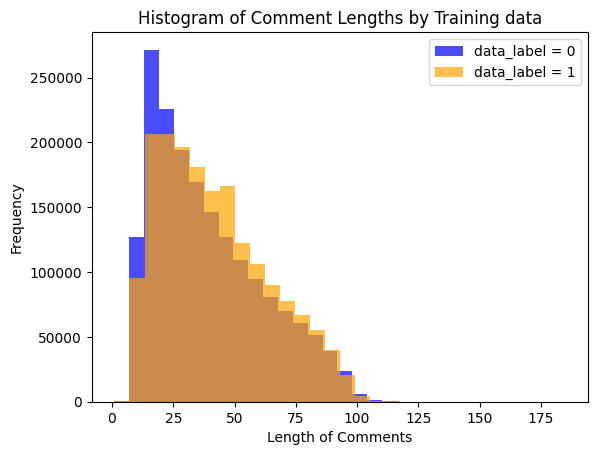

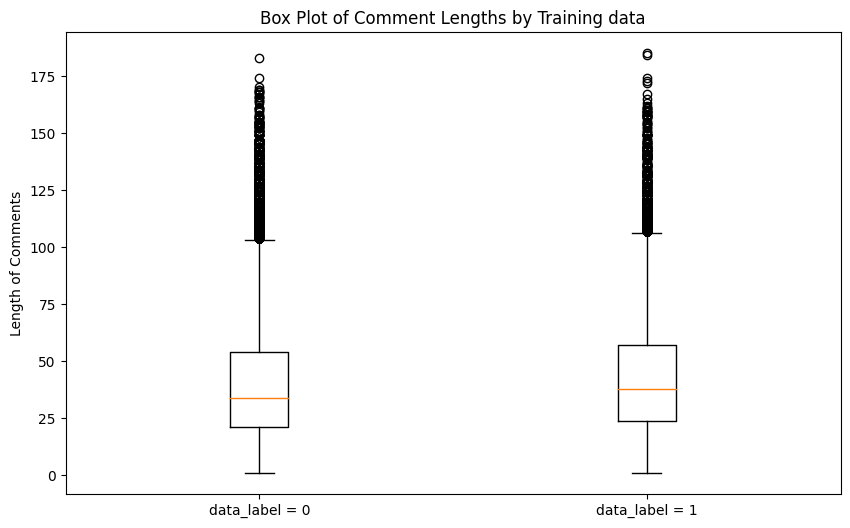

Mean length of comments for data_label = 0: 39.45
Standard deviation of length of comments for data_label = 0: 22.31
Mean length of comments for data_label = 1: 41.98
Standard deviation of length of comments for data_label = 1: 22.01


In [ ]:
# Example usage
plot_comment_length_histogram(df_train, 'Training')

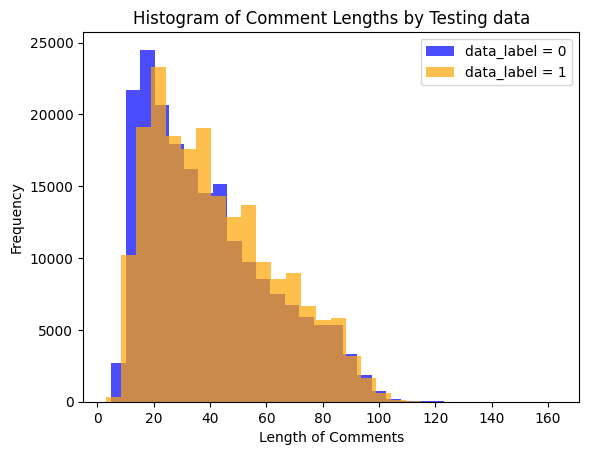

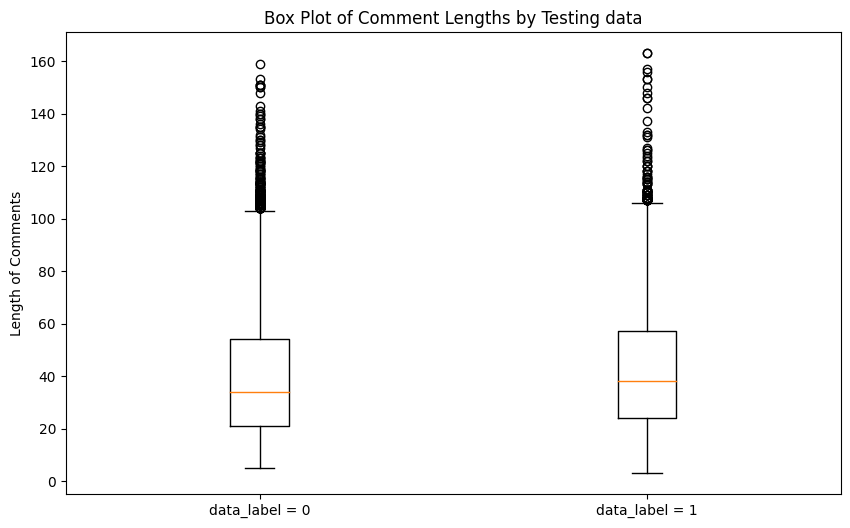

Mean length of comments for data_label = 0: 39.47
Standard deviation of length of comments for data_label = 0: 22.30
Mean length of comments for data_label = 1: 41.95
Standard deviation of length of comments for data_label = 1: 22.00


In [ ]:
plot_comment_length_histogram(df_test, 'Testing')

In [ ]:
import matplotlib.pyplot as plt

def plot_comment_length_histogram(data_frame, name):
    # Separate the DataFrame into two groups based on 'data_label'
    df_label0 = data_frame[data_frame['data_label'] == 0]
    df_label1 = data_frame[data_frame['data_label'] == 1]

    # Plot histograms for each group
    plt.hist(df_label0['length_comments'], bins=30, color='blue', alpha=0.7, label='data_label = 0')
    plt.hist(df_label1['length_comments'], bins=30, color='orange', alpha=0.7, label='data_label = 1')

    # Set labels and title
    plt.xlabel('Length of Comments')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Comment Lengths by {name} data')  # Dynamic title
    plt.legend()

    # Show the plot
    plt.show()

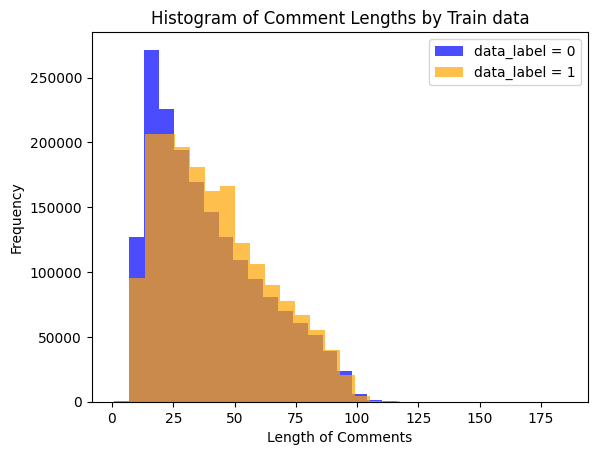

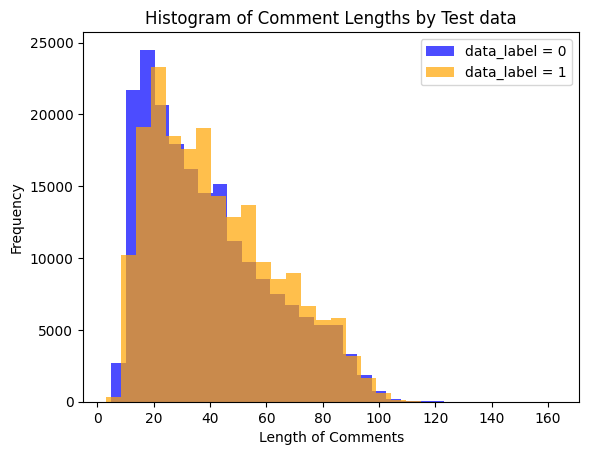

In [ ]:
# Assuming you have a DataFrame named 'df_train'
df_train.name = 'Train'
plot_comment_length_histogram(df_train, df_train.name)

# Assuming you have a DataFrame named 'df_test'
df_test.name = 'Test'
plot_comment_length_histogram(df_test, df_test.name)

In [ ]:
# read the data for lemmatized
path_train_le = path_n + '/01_Dataset/01_P14_Amazon Reviews for Sentiment Analysis/lemmatized_data/df_amazon_train_clean_en_lem_count_1125.csv'

df_train_le = pd.read_csv(path_train_le)

<ipython-input-8-df4e4c0952f6>:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train['data_length'], color="firebrick", linewidth=5)


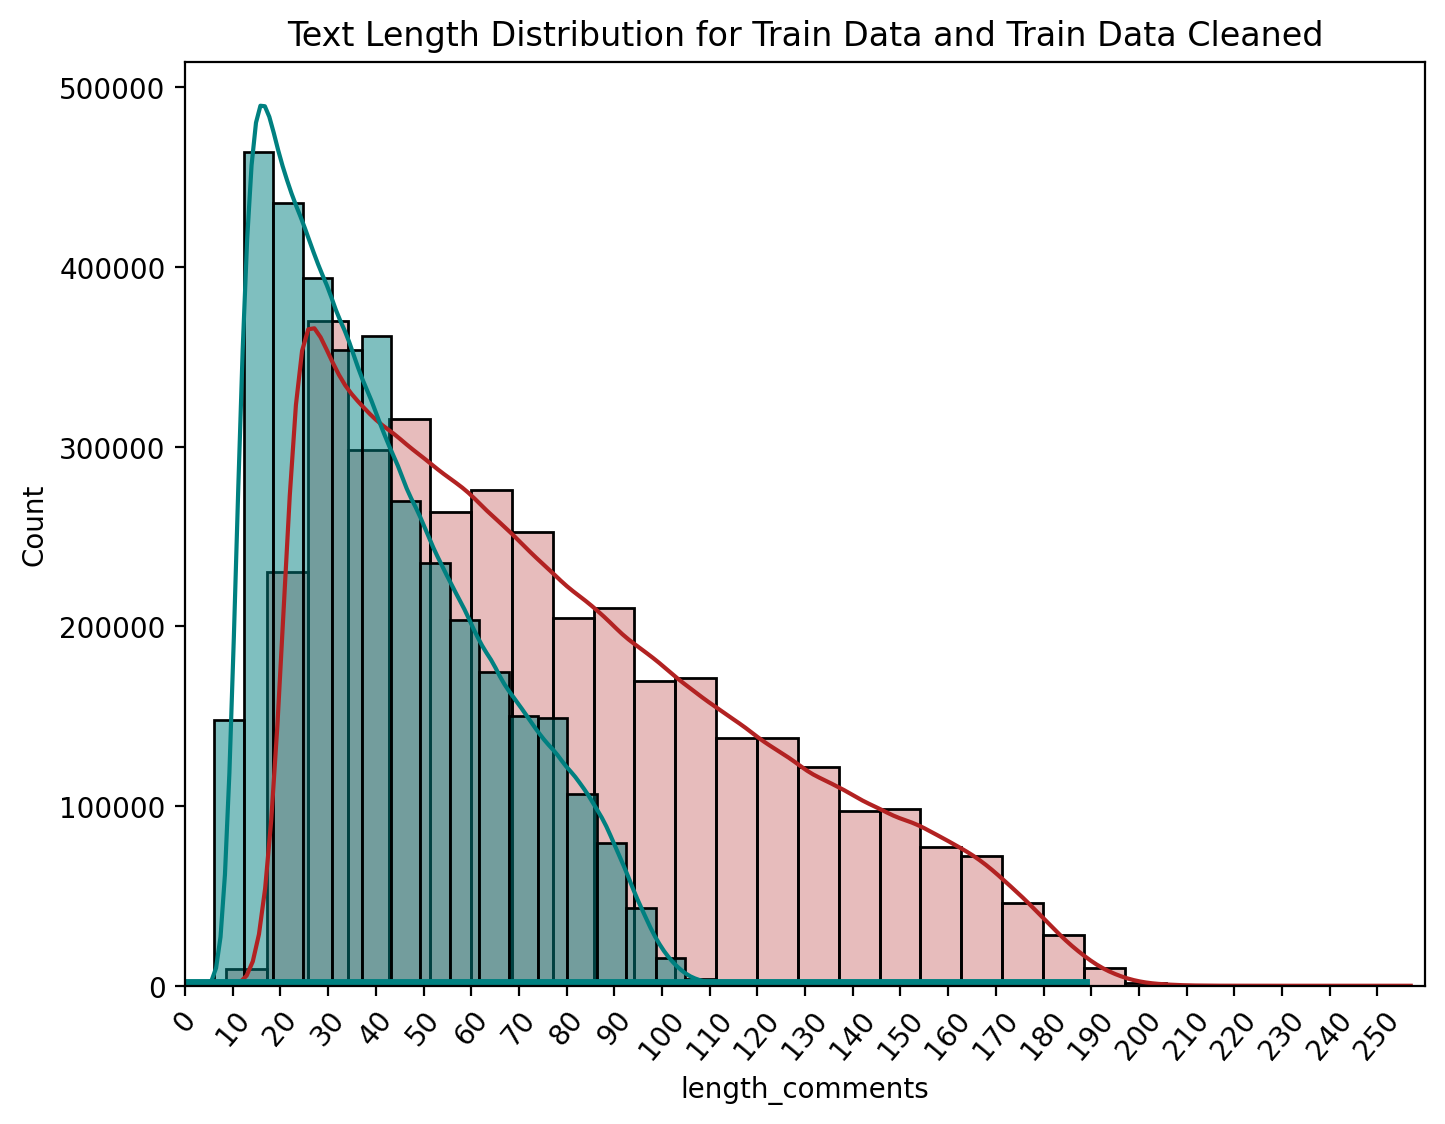

In [ ]:
# Draw the histograms
df_train_le['data_length'] = df_train_le['length_comments_lemmatized']

# Set the same interval as the original one
intervals = list(range(0, 260, 10))

plt.figure(figsize=(8, 6))

# Plot the first histogram
sns.histplot(df_train['length_comments'], kde=True, color="firebrick", stat="count", bins=30, alpha=0.3)

# Set color for the first KDE line
sns.kdeplot(df_train['data_length'], color="firebrick", linewidth=5)

# Plot the second histogram
sns.histplot(df_train_le['length_comments_lemmatized'], kde=True, color="teal", stat="count", bins=30)

# Set x-axis ticks and labels
plt.xticks(intervals, rotation = 50)

# Set x-axis limit to include the entire range up to 260
plt.xlim(0, 260)

# Set color for the second KDE line
sns.kdeplot(df_train_le['data_length'], color="teal", linewidth=5)

plt.title("Text Length Distribution for Train Data and Train Data Cleaned")
plt.show()

## 6.2 Good words and bad words used frequency for each comments

In [ ]:
# we took the top 20 frenquent words for the positive and negative words
# Positive words
words_list_pos = ['great', 'love', 'best', 'good', 'excellent', 'well', 'easy', 'wonderful',
                  'fun', 'perfect', 'highly', 'favorite', 'amazing', 'recommend', 'must',
                  'awesome', 'nice', 'fantastic', 'beautiful', 'enjoy']

# Negative words
words_list_neg = ['money', 'cheap', 'waste', 'bad', 'even', 'disappoint', 'not', 'poor',
                  'nothing', 'boring', 'instead', 'terrible', 'horrible', 'try', 'return',
                  'worst', 'never', 'break', 'less', 'dis']

words_list_both = words_list_pos + words_list_neg

print(len(words_list_pos))
print(len(words_list_neg))

20
20


In [ ]:
def words_list_counts(df, words_list_both):

  for word in words_list_both:
    if word == 'tried':
      df[word] = df['comments'].apply(lambda x: str(x).lower().count('trying')
                                                + str(x).lower().count('try')
                                                + str(x).lower().count('tried'))
    else:
      df[word] = df['comments'].apply(lambda x: str(x).lower().count(word))

    print(f'{word}_max:', df[word].max())
    print(f'{word}_min:', df[word].min())

  df['total'] = df.iloc[:, 3:len(df)+1].sum(axis=1)
  counts = df['total'].value_counts()
  print('sum of words list: \n', counts)

  df = df.drop(['total'], axis=1)

  print(df)
  return df

In [ ]:
df_train = words_list_counts(df_train, words_list_both)
df_test = words_list_counts(df_test, words_list_both)

great_max: 18
great_min: 0
love_max: 54
love_min: 0
best_max: 20
best_min: 0
good_max: 43
good_min: 0
excellent_max: 14
excellent_min: 0
well_max: 10
well_min: 0
easy_max: 10
easy_min: 0
wonderful_max: 7
wonderful_min: 0
fun_max: 12
fun_min: 0
perfect_max: 12
perfect_min: 0
highly_max: 5
highly_min: 0
favorite_max: 6
favorite_min: 0
amazing_max: 25
amazing_min: 0
recommend_max: 8
recommend_min: 0
must_max: 18
must_min: 0
awesome_max: 13
awesome_min: 0
nice_max: 22
nice_min: 0
loved_max: 8
loved_min: 0
beautiful_max: 21
beautiful_min: 0
enjoy_max: 7
enjoy_min: 0
money_max: 30
money_min: 0
dont_max: 34
dont_min: 0
waste_max: 9
waste_min: 0
bad_max: 113
bad_min: 0
disappointed_max: 7
disappointed_min: 0
didnt_max: 12
didnt_min: 0
poor_max: 11
poor_min: 0
worst_max: 17
worst_min: 0
nothing_max: 30
nothing_min: 0
boring_max: 39
boring_min: 0
doesnt_max: 10
doesnt_min: 0
terrible_max: 9
terrible_min: 0
horrible_max: 50
horrible_min: 0
tried_max: 14
tried_min: 0
return_max: 9
return_min: 0
di

In [ ]:
df_train = df_train.drop(['total'], axis=1)
df_test = df_test.drop(['total'], axis=1)

print(len(df_train.columns))
print(len(df_test.columns))

43
43


In [ ]:
import pandas as pd

# Your data
data = {
    'Words': ['great', 'love', 'best', 'good', 'excellent', 'not', 'bad', 'waste', 'horrible', 'disappoint'],
    'positive score': [876757, 562007, 7611, 875260, 164578, 968331, 80143, 9276, 5158, 40101],
    'negative score': [262289, 185145, 6252, 527854, 24313, 1748653, 381381, 208984, 73868, 261346]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate total score for normalization
df['total score'] = df['positive score'] + df['negative score']

# Calculate percentage of positive and negative scores for each word
df['positive percentage'] = (df['positive score'] / df['total score']) * 100
df['negative percentage'] = (df['negative score'] / df['total score']) * 100

# Display the updated DataFrame with percentages
# print(df[['Words', 'positive percentage', 'negative percentage']])
df.sort_values(by='negative score', ascending=False)

Words  positive score  negative score  total score  \
5         not          968331         1748653      2716984   
3        good          875260          527854      1403114   
6         bad           80143          381381       461524   
0       great          876757          262289      1139046   
9  disappoint           40101          261346       301447   
7       waste            9276          208984       218260   
1        love          562007          185145       747152   
8    horrible            5158           73868        79026   
4   excellent          164578           24313       188891   
2        best            7611            6252        13863   

   positive percentage  negative percentage  
5            35.639923            64.360077  
3            62.379821            37.620179  
6            17.364861            82.635139  
0            76.972923            23.027077  
9            13.302836            86.697164  
7             4.249977            95.750023  
1            75.219902            24.780098  
8             6.526966            93.473034  
4            87.128556            12.871444  
2            54.901536            45.098464

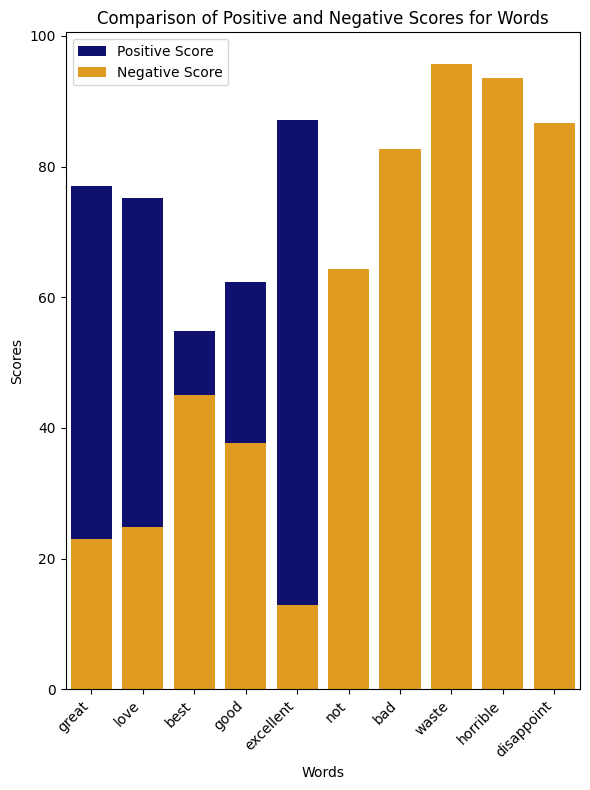

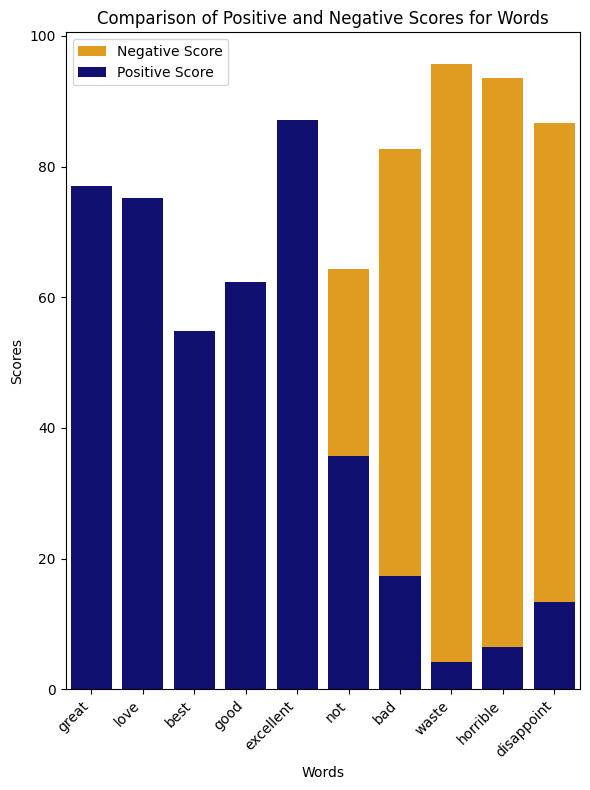

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plotting the bar chart
plt.figure(figsize=(6, 8))
sns.barplot(data=df, x='Words', y='positive percentage', color='navy', label='Positive Score')
sns.barplot(data=df, x='Words', y='negative percentage', color='orange', label='Negative Score')
plt.title('Comparison of Positive and Negative Scores for Words')
plt.xlabel('Words')
plt.ylabel('Scores')
plt.xticks(rotation=45, ha='right')

# Formatting y-axis to display integers
plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)

plt.legend()
plt.tight_layout()
plt.show()

# Plotting the bar chart
plt.figure(figsize=(6, 8))
sns.barplot(data=df, x='Words', y='negative percentage', color='orange', label='Negative Score')
sns.barplot(data=df, x='Words', y='positive percentage', color='navy', label='Positive Score')
plt.title('Comparison of Positive and Negative Scores for Words')
plt.xlabel('Words')
plt.ylabel('Scores')
plt.xticks(rotation=45, ha='right')

# Formatting y-axis to display integers
plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)

plt.legend()
plt.tight_layout()
plt.show()

# <font color="red"> **Part 2**
Load the cleaned, explored and engineered data for the following sections

In [ ]:
# this is the result for cleaned, explored and feature engineering data, which is used for the following sections
path_train_lem = "/content/drive/MyDrive/01_fil_rouge_project_files/01_Dataset/01_P14_Amazon Reviews for Sentiment Analysis/lemmatized_data/df_train_clean_sw_lemmatized_wlist_en_1110.csv"
df_train_lem = pd.read_csv(path_train_lem)

df_train_clean = df_train_lem
df_train_clean

data_label                                           comments  \
0                 0  stuning even nongamer sound track beautiful pa...   
1                 0  best soundtrack ever anything im reading lot r...   
2                 0  amazing soundtrack favorite music time hands i...   
3                 0  excellent soundtrack truly like soundtrack enj...   
4                 0  remember pull jaw floor hearing youve played g...   
...             ...                                                ...   
3591475           1  dont high chair looks great first comes box hi...   
3591476           1  looks nice low functionality used highchair  k...   
3591477           1  compact hard clean small house really wanted t...   
3591478           1  saying sure book supposed really rehash old id...   
3591479           0  makes blood run redwhiteandblue agree every am...   

                                       comments_lemmatized  length_comments  \
0        stun even nongamer sound track beautiful paint...               43   
1        good soundtrack ever anything I m read lot rev...               49   
2        amazing soundtrack favorite music time hand in...               73   
3        excellent soundtrack truly like soundtrack enj...               72   
4        remember pull jaw floor hear you ve play game ...               47   
...                                                    ...              ...   
3591475  do not high chair look great first come box hi...               34   
3591476  look nice low functionality use highchair   ki...               81   
3591477  compact hard clean small house really want two...               92   
3591478  say sure book suppose really rehash old idea c...               40   
3591479  make blood run redwhiteandblue agree every ame...               75   

         great  love  best  good  excellent  well  ...  instead  terrible  \
0            0     0     0     1          0     1  ...        0         0   
1            0     0     0     2          0     0  ...        0         0   
2            0     0     0     1          0     1  ...        0         0   
3            0     1     0     1          2     0  ...        0         0   
4            1     0     0     2          0     0  ...        0         0   
...        ...   ...   ...   ...        ...   ...  ...      ...       ...   
3591475      1     0     0     0          0     0  ...        0         0   
3591476      1     0     0     0          0     1  ...        0         0   
3591477      3     0     0     0          0     1  ...        0         0   
3591478      0     0     0     0          0     2  ...        0         0   
3591479      0     0     0     2          0     0  ...        0         0   

         horrible  try  return  worst  never  break  less  dis  
0               0    0       0      0      0      0     0    0  
1               0    0       0      0      0      0     1    1  
2               0    0       0      0      1      0     0    1  
3               0    0       0      0      0      0     0    3  
4               0    0       0      0      0      0     0    0  
...           ...  ...     ...    ...    ...    ...   ...  ...  
3591475         0    0       0      0      0      0     1    0  
3591476         0    0       0      0      0      0     0    0  
3591477         0    0       0      0      1      0     0    0  
3591478         0    0       0      0      0      0     0    0  
3591479         0    0       0      0      0      0     0    0  

[3591480 rows x 44 columns]

#**7.   Data split (Train, Validation, Test)**

*   We will split the 20% of the training data for the model validation.



In [ ]:
df_train_clean.isnull().sum()

data_label           0
comments             0
detected_language    0
dtype: int64

In [ ]:
df_test_clean.isnull().sum()

data_label           0
comments             0
detected_language    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# In the dataset, we found the majority of the language is "english", so we only take "english" comments for training our model
df_train_en = df_train_clean[df_train_clean['detected_language'] == 'en']

val_size = 0.2
train_size = 0.8

# Split the data into a 20% test set and an 80% training set with stratification
df_train_train, df_train_val = train_test_split(df_train_en, test_size=val_size, train_size=train_size, random_state=42, stratify=df_train_en['data_label'])

## 7.1 Training data

In [ ]:
# Assuming you have a DataFrame named 'df_train_en_val'
# Show 80% of the training data
df_train_train = df_train_train.reset_index(drop = True)
df_train_train

data_label                                           comments
0                 0   perfect headphone holder   as well as holding...
1                 1   medisana ultrasonic personal humidifier   the...
2                 1   too little too late   six months ago as no co...
3                 0   some insightful information   i really enjoye...
4                 0   sit n stroll   this is really good for travel...
...             ...                                                ...
2154884           0   awesomely progressive   sublime was the best ...
2154885           1   a let down   i was expecting so much more whe...
2154886           0   my reference book for the last 18 months   i ...
2154887           0   great gift   we could not put it together fas...
2154888           1   for children   i purchased this thinking it w...

[2154889 rows x 2 columns]

## 7.2 Validation data

In [ ]:
# Assuming you have a DataFrame named 'df_train_en_val'
# Show 20% of the training data
df_train_val = df_train_val.reset_index(drop = True)
df_train_val

data_label                                           comments
0                 1   sounds like the tip issue is common   ive bee...
1                 1   finally figured it out   i suppose the mfg as...
2                 0   a quick read dark and emotionally satisfying ...
3                 1   ripped off   bought this center link and tie ...
4                 1   rip off   be careful when ordering this produ...
...             ...                                                ...
1436588           0   the original scream   halloween is the origin...
1436589           1   did not work at all   i purchased a 16 oz bot...
1436590           1   half a book   this book reads as if its only ...
1436591           1   waste of time   now i see the price of the se...
1436592           0   best gift ever   possibly my kids most favori...

[1436593 rows x 2 columns]

## 7.3 Testing data

In [ ]:
df_test_clean = df_test_clean.reset_index(drop = True)
df_test_clean

data_label                                           comments
0                0   great cd   my lovely pat has one of the great...
1                0   one of the best game music soundtracks  for a...
2                1   batteries died within a year    i bought this...
3                0   works fine but maha energy is better   check ...
4                0   great for the nonaudiophile   reviewed quite ...
...            ...                                                ...
398999           1   unbelievable in a bad way   we bought this th...
399000           1   almost great until it broke   my son recieved...
399001           1   disappointed    i bought this toy for my son ...
399002           0   classic jessica mitford   this is a compilati...
399003           1   comedy scene and not heard   this dvd will be...

[399004 rows x 2 columns]

#**8.  Tokenize data for NLP**



*   make the words into vectors, it will also take a long time

In [ ]:
# syspath = sys.path[1]+'/hotl'
# os.chdir(syspath)
# load Bert-Pre-training # Uncased: keep capital letter; cased:make the capital letters lower()
config_path = '/content/drive/MyDrive/01RNN_NLP/01RNN/uncased_L-12_H-768_A-12/bert_config.json'# attachment
checkpoint_path = '/content/drive/MyDrive/01RNN_NLP/01RNN/uncased_L-12_H-768_A-12/bert_model.ckpt'
dict_path = '/content/drive/MyDrive/01RNN_NLP/01RNN/uncased_L-12_H-768_A-12/vocab.txt'

maxlen=100 # max length of comments，padding the words to the same length (max 512)

In [ ]:
def get_token_dict(dict_path):
    '''
    :param: dict_path: "vocab.txt" is bert model's document
    :return: Encode characters in the file
    '''
    # Encode the words in the bert model
    # The purpose is to feed the model with encoding

    token_dict = {}
    with codecs.open(dict_path, 'r', 'utf-8') as reader:
        for line in reader:
            token = line.strip()
            token_dict[token] = len(token_dict)
    return token_dict

In [ ]:
token_dict = get_token_dict(dict_path)
print(token_dict)

{'[PAD]': 0, '[unused0]': 1, '[unused1]': 2, '[unused2]': 3, '[unused3]': 4, '[unused4]': 5, '[unused5]': 6, '[unused6]': 7, '[unused7]': 8, '[unused8]': 9, '[unused9]': 10, '[unused10]': 11, '[unused11]': 12, '[unused12]': 13, '[unused13]': 14, '[unused14]': 15, '[unused15]': 16, '[unused16]': 17, '[unused17]': 18, '[unused18]': 19, '[unused19]': 20, '[unused20]': 21, '[unused21]': 22, '[unused22]': 23, '[unused23]': 24, '[unused24]': 25, '[unused25]': 26, '[unused26]': 27, '[unused27]': 28, '[unused28]': 29, '[unused29]': 30, '[unused30]': 31, '[unused31]': 32, '[unused32]': 33, '[unused33]': 34, '[unused34]': 35, '[unused35]': 36, '[unused36]': 37, '[unused37]': 38, '[unused38]': 39, '[unused39]': 40, '[unused40]': 41, '[unused41]': 42, '[unused42]': 43, '[unused43]': 44, '[unused44]': 45, '[unused45]': 46, '[unused46]': 47, '[unused47]': 48, '[unused48]': 49, '[unused49]': 50, '[unused50]': 51, '[unused51]': 52, '[unused52]': 53, '[unused53]': 54, '[unused54]': 55, '[unused55]': 56

In [ ]:
def get_data(df_train):
    # train=pd.read_csv("/content/drive/MyDrive/01_Python/00_Python_Project/03_datasets/01_train/Train01-date.csv").reset_index(drop=True)
    train=df_train
    return train

In [ ]:
# get_encode
def get_encode(df,token_dict):

    # tokenizer = OurTokenizer(token_dict)
    tokenizer = Tokenizer(token_dict)
    X1 = []
    X2 = []
    for i in range(df.shape[0]):
        # x1,x2 = tokenizer.encode(first=df.News.values[i].strip())
        x1,x2 = tokenizer.encode(first=df.data.values[i].strip())
        X1.append(x1)
        X2.append(x2)
        # print(x1)
        # print(x2)

    X1 = sequence.pad_sequences(X1,maxlen=maxlen,padding='post',truncating='post')
    X2 = sequence.pad_sequences(X2,maxlen=maxlen,padding='post',truncating='post')
    # y = df.Label.values
    y = df.data_label.values
    # print(y)
    return [y,X1,X2]

## 8.1 Tokenize comment

In [ ]:
train = get_data(df_train)
token_dict = get_token_dict(dict_path)
[y,X1,X2] = get_encode(train,token_dict)

In [ ]:
print([y,X1,X2])
type(X1)

[array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1]), array([[  101, 24646,  5582, ...,     0,     0,     0],
       [  101,  1996,  2190, ...,  2028,  2008,  1045],
       [  101,  6429,  1012, ..., 15222,  2015,  6050],
       ...,
       [  101, 11320, 14808, ...,     0,     0,     0],
       [  101,  3063,  2854, ...,     0,     0,     0],
       [  101, 14046,  1012, ...,     0,     0,     0]], dtype=int32), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)]


numpy.ndarray

In [ ]:
print(y.dtype)
print(X1.dtype)
print(X2.dtype)

int64
int32
int32


### read data

In [ ]:
# Read the token data
path_token_folder = '/content/drive/MyDrive/03_Rennes_School_of_Business/00_fil_rouge_project/01_fil_rouge_project_files/01_Dataset/01_P14_Amazon Reviews for Sentiment Analysis/token_data/'
path_token_y = path_token_folder + 'bert_amazon_1115_en65_lem_y.csv'
path_token_X1 = path_token_folder + 'bert_amazon_1115_en65_lem_X1.csv'
path_token_X2 = path_token_folder + 'bert_amazon_1115_en65_lem_X2.csv'

In [ ]:
import numpy as np

# Read X0.csv and convert it back to a NumPy array
y = np.genfromtxt(path_token_y, delimiter=',', dtype=int, skip_header=1)  # skip the header row

# Read X1.csv and convert it back to a NumPy array with dtype=int32
X1 = np.genfromtxt(path_token_X1, delimiter=',', dtype=np.int32, skip_header=1)  # skip the header row

# Read X2.csv and convert it back to a NumPy array with dtype=int32
X2 = np.genfromtxt(path_token_X2, delimiter=',', dtype=np.int32, skip_header=1)  # skip the header row

In [ ]:
print([y, X1, X2])

[array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1]), array([[  101, 24646,  5582, ...,     0,     0,     0],
       [  101,  1996,  2190, ...,  2028,  2008,  1045],
       [  101,  6429,  1012, ..., 15222,  2015,  6050],
       ...,
       [  101, 11320, 14808, ...,     0,     0,     0],
       [  101,  3063,  2854, ...,     0,     0,     0],
       [  101, 14046,  1012, ...,     0,     0,     0]], dtype=int32), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)]


In [ ]:
print(y.dtype)
print(X1.dtype)
print(X2.dtype)

int64
int32
int32


#**9.  Model building - Model 1**

## 9.1 Import library

In [ ]:
!pip install keras_bert

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [ ]:
import codecs
import os
import sys
import pandas as pd
import numpy as np
from tensorflow.keras import Input, Model, losses, applications, datasets# , wrappers
from tensorflow.keras.layers import Lambda, Dense #LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import sequence
from keras_bert import Tokenizer, load_trained_model_from_checkpoint
import seaborn as sns
import warnings

In [ ]:
# Save token data
path_token = '/content/drive/MyDrive/03_Rennes_School_of_Business/00_fil_rouge_project/01_fil_rouge_project_files/Nick/01_model_save/'

# Save model
path_save = '/content/drive/MyDrive/03_Rennes_School_of_Business/00_fil_rouge_project/01_fil_rouge_project_files/Nick/01_model_save/'
filename = 'bert_amazon_1024'

## 9.2 Load tokenize data

In [ ]:
x1 = pd.read_csv(path_token_X1)
x1

# X1_0   X1_1  X1_2  X1_3   X1_4  X1_5  X1_6   X1_7   X1_8   X1_9  \
0           101  23657  4653  1202   1077  1068  1584  15695   1171   1012   
1           101   1068  1262  5121   1484  1072  1577   1012   9114   2823   
2           101   5499  1012  1095   5121  1075  1098   4511   1261   1069   
3           101   5651  5121  1012   1045  4692  1138   1095   5121   1070   
4           101   2413  3210  1187   4801  1197  1068   1795   1116   4065   
...         ...    ...   ...   ...    ...   ...   ...    ...    ...    ...   
3599995     101   1195  1174  1151   1081  1012  1068   1224   2313   2575   
3599996     101   2575  2906  1731  14431  1012  1045   1103   1181   1095   
3599997     101   8300  1093  1596   1072  3621  1012   1129   1103   1037   
3599998     101   1126  1075  1081   2110  1012  1097   1541   1126   1095   
3599999     101   2156  1098  1740   1520  1489  1932  15629  10283  17973   

         ...  X1_90  X1_91  X1_92  X1_93  X1_94  X1_95  X1_96  X1_97  X1_98  \
0        ...   1112  14030   1072   4023    102      0      0      0      0   
1        ...   1095   1244   1841   1095   1075   1068   1141   1100   1080   
2        ...   8562   1096   1107   6147  20712   1076   1164  14275  20955   
3        ...   1262   1069   1068   1165   2942   1069   1715   9446   4019   
4        ...   7609   1082   1612   1078   1070   1698   1081   1163   1078   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
3599995  ...    102      0      0      0      0      0      0      0      0   
3599996  ...   1097   1151   1080   1108   1081   1075   1272   2154   1070   
3599997  ...   1103   5997   2988   7246   1045   1195   1174   1103   1037   
3599998  ...   3030  18368   1102   8100  24562   3593   4721  20955    102   
3599999  ...   1068   2495   3426   6944  12662   2743  19365   1121   1661   

         X1_99  
0            0  
1         1045  
2         5121  
3         6430  
4         2330  
...        ...  
3599995      0  
3599996   1596  
3599997   1915  
3599998      0  
3599999   1037  

[3600000 rows x 100 columns]

In [ ]:
import numpy as np

# Read X0.csv and convert it back to a NumPy array
y = np.genfromtxt(path_token_y, delimiter=',', dtype=int, skip_header=1)  # skip the header row

# Read X1.csv and convert it back to a NumPy array with dtype=int32
X1 = np.genfromtxt(path_token_X1, delimiter=',', dtype=np.int32, skip_header=1)  # skip the header row

# Read X2.csv and convert it back to a NumPy array with dtype=int32
X2 = np.genfromtxt(path_token_X2, delimiter=',', dtype=np.int32, skip_header=1)  # skip the header row

In [ ]:
print([y, X1, X2])

[array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1]), array([[  101, 24646,  5582, ...,     0,     0,     0],
       [  101,  1996,  2190, ...,  2028,  2008,  1045],
       [  101,  6429,  1012, ..., 15222,  2015,  6050],
       ...,
       [  101, 11320, 14808, ...,     0,     0,     0],
       [  101,  3063,  2854, ...,     0,     0,     0],
       [  101, 14046,  1012, ...,     0,     0,     0]], dtype=int32), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)]


In [ ]:
print(y.dtype)
print(X1.dtype)
print(X2.dtype)

int64
int32
int32


## 9.3 Training Model 1

In [ ]:
#LSTM News+Stock_info
def build_bert_model_L1(y, X1, X2, path_save, filename, epochs_n, batch_size_n, patience_stop):

    bert_model = load_trained_model_from_checkpoint(config_path, checkpoint_path, seq_len=None)

    for l in bert_model.layers:
      l.trainable = True
      # l.trainable = False

    x1 = Input(shape=(None,))
    x2 = Input(shape=(None,))
    x = bert_model([x1,x2])

    # continue LSTM
    bi_lstm = keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True))(x)
    avg_pool = keras.layers.GlobalAveragePooling1D()(bi_lstm)
    max_pool = keras.layers.GlobalMaxPooling1D()(bi_lstm)

    concat = keras.layers.Concatenate()([avg_pool, max_pool]) #([avg_pool, max_pool])
    dropout = keras.layers.Dropout(0.5)(concat)
    p = Dense(1,activation='sigmoid')(concat)
    model = Model([x1,x2],p)
    model.compile(loss=losses.binary_crossentropy,
                  optimizer=Adam(1e-5),
                  metrics=['accuracy'])
    model.summary()

    checkpoint = keras.callbacks.ModelCheckpoint(path_save + filename + '.h5', monitor='val_accuracy', mode="max", save_best_only=True, verbose=1)
    earlystopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  mode="max",
                                                  patience=patience_stop,
                                                  verbose=1)
    rlr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                            factor=0.1,
                                            patience=3,
                                            verbose=1,
                                            mode='auto',
                                            min_delta=0.0001)

    model_his = model.fit([X1,X2],
                          y,
                          epochs=epochs_n,
                          batch_size=batch_size_n,
                          validation_split=0.2,
                          callbacks=[checkpoint,earlystopping,rlr])

    return model, model_his

In [ ]:
bert_model, bert_model_his = build_bert_model_L1(y,X1,X2, path_save, filename, epochs_n, batch_size_n, patience_stop) #1

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 model_7 (Functional)        (None, None, 768)            1088916   ['input_5[0][0]',             
                                                          48         'input_6[0][0]']             
                                                                                                  
 bidirectional_2 (Bidirecti  (None, None, 64)             205056    ['model_7[0][0]']       

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 259s 21s/step - loss: -0.0933 - accuracy: 0.3500 - val_loss: -0.9258 - val_accuracy: 0.4500 - lr: 1.0000e-05
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: -1.5491 - accuracy: 0.4625
Epoch 2: val_accuracy did not improve from 0.45000
10/10 [==============================] - 3s 315ms/step - loss: -1.5491 - accuracy: 0.4625 - val_loss: -1.7793 - val_accuracy: 0.4500 - lr: 1.0000e-05
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: -2.2113 - accuracy: 0.4625
Epoch 3: val_accuracy did not improve from 0.45000
10/10 [==============================] - 3s 282ms/step - loss: -2.2113 - accuracy: 0.4625 - val_loss: -2.4006 - val_accuracy: 0.4500 - lr: 1.0000e-05
Epoch 4/20
10/10 [==============================] - ETA: 0s - loss: -2.6746 - accuracy: 0.4625
Epoch 4: val_accuracy did not improve from 0.45000
10/10 [==============================] - 2s 244ms/step - loss: -2.6746 - accuracy: 0.4625 - val_loss: -2.7605 - 

#**10.  Model building - Model 2 (Better result)**


## 10.1 Import library

In [ ]:
!pip install keras_bert

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [ ]:
import codecs
import os
import sys
import pandas as pd
import numpy as np
from tensorflow.keras import Input, Model, losses, applications, datasets# , wrappers
from tensorflow.keras.layers import Lambda, Dense #LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import sequence
from keras_bert import Tokenizer, load_trained_model_from_checkpoint
import seaborn as sns
import warnings

In [ ]:
path_save = '/home/310712009/Desktop/RSB_project/02_model_save/'
path_save_result = '/home/310712009/Desktop/RSB_project/03_result_save/'
filename = 'bert_amazon_1115_en65_lem_'
filename_modelsave = 'bert_amazon_1115_en65_lem_'
maxlen_n = 65
epochs_n = 30
batch_size_n = 64
patience_stop = 5
monitor_factor = 'val_loss'
monitor_mode = "min"

from tensorflow.keras.layers import Input, Dense, Concatenate, Bidirectional, LSTM, Conv1D, GlobalAveragePooling1D, BatchNormalization, Dropout, MaxPooling1D, Flatten


## 10.2 Load tokenize data

In [ ]:
# read data
path_n = '/content/drive/MyDrive/03_Rennes_School_of_Business/00_fil_rouge_project/01_fil_rouge_project_files/01_Dataset/01_P14_Amazon Reviews for Sentiment Analysis/'
path_train_c = path_n + 'df_amazon_train_clean_en04_lem_1115.csv'
path_test_c = path_n + 'df_amazon_test_clean_en_lem_1115.csv'

# Save token data
path_token = '/content/drive/MyDrive/03_Rennes_School_of_Business/00_fil_rouge_project/01_fil_rouge_project_files/Nick/token_data/'
filename_token = 'bert_amazon_1115_en65_lem_'

In [ ]:
df_train = pd.read_csv(path_train_c)
df_test = pd.read_csv(path_test_c)

In [ ]:
#loading the token data

# Read y.csv and convert it back to a NumPy array
print('Read y.csv now')
y = np.genfromtxt(path_token + filename + 'y.csv', delimiter=',', dtype=int, skip_header=1)  # skip the header row

# Read X1.csv and convert it back to a NumPy array with dtype=int32
print('Read X1.csv now')
X1 = np.genfromtxt(path_token + filename + 'X1.csv', delimiter=',', dtype=np.int32, skip_header=1)  # skip the header row

# Read X2.csv and convert it back to a NumPy array with dtype=int32
print('Read X2.csv now')
X2 = np.genfromtxt(path_token + filename + 'X2.csv', delimiter=',', dtype=np.int32, skip_header=1)  # skip the header row

print([y, X1, X2])

[array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1]), array([[  101, 24646,  5582, ...,     0,     0,     0],
       [  101,  1996,  2190, ...,  2028,  2008,  1045],
       [  101,  6429,  1012, ..., 15222,  2015,  6050],
       ...,
       [  101, 11320, 14808, ...,     0,     0,     0],
       [  101,  3063,  2854, ...,     0,     0,     0],
       [  101, 14046,  1012, ...,     0,     0,     0]], dtype=int32), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)]


In [ ]:
print('Read X3.csv now')
X3 = df_train.iloc[:, 2:43].to_numpy()

## 10.3 Training Model 2

In [ ]:
def build_bert_model_CNN(y, X1, X2, X3, path_save, filename, monitor_factor, monitor_mode, epochs_n, batch_size_n, patience_stop):
    # Load Google's pre-trained BERT model
    bert_model = load_trained_model_from_checkpoint(config_path, checkpoint_path, seq_len=None)

    for l in bert_model.layers:
        l.trainable = True

    # Input layers
    input_x1 = Input(shape=(None,))
    input_x2 = Input(shape=(None,))
    input_x3 = Input(shape=(41,1))

    # Connect to BERT model
    x = bert_model([input_x1, input_x2])

    # Connect to LSTM Layers
    bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(x)

    # Global Pooling
    avg_pool = tf.keras.layers.GlobalAveragePooling1D()(bi_lstm)
    max_pool = tf.keras.layers.GlobalMaxPooling1D()(bi_lstm)

    # Convolutional Layers
    conv1 = Conv1D(64, kernel_size=3, activation='relu')(input_x3)
    conv1 = BatchNormalization()(conv1)

    conv2 = Conv1D(64, kernel_size=3, activation='tanh')(conv1)
    conv2 = Dropout(0.25)(conv2)

    conv3 = Conv1D(32, kernel_size=3, activation='relu')(conv2)
    conv3 = MaxPooling1D(pool_size=2)(conv3)
    conv3 = Dropout(0.25)(conv3)

    conv3_flat = Flatten()(conv3)
    x3d = Dense(41, activation='tanh')(conv3_flat)

    # Concatenate
    concat = Concatenate()([avg_pool, max_pool, x3d])

    dropout = Dropout(0.5)(concat)
    output_layer = Dense(1, activation='sigmoid')(dropout)

    # Model
    model = Model([input_x1, input_x2, input_x3], output_layer)

    from sklearn.metrics import f1_score

    def f1_metric(y_true, y_pred):
        return tf.py_function(f1_score, (y_true, tf.round(y_pred)), tf.float64)

    # Compile model
    model.compile(loss=losses.binary_crossentropy,
                  optimizer=SGD(learning_rate=0.00005), #(learning_rate=1e-5),  # Adjust the learning rate as needed
                  metrics=[f1_metric])

    model.summary()

    # Callbacks
    checkpoint = tf.keras.callbacks.ModelCheckpoint(path_save + filename + '.h5',
                                                    monitor=monitor_factor,
                                                    mode=monitor_mode,
                                                    save_best_only=True,
                                                    verbose=1)
    earlystopping = tf.keras.callbacks.EarlyStopping(monitor=monitor_factor,
                                                     mode=monitor_mode,
                                                     patience=patience_stop,
                                                     verbose=1)
    rlr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                               factor=0.1,
                                               patience=3,
                                               verbose=1,
                                               mode='auto',
                                               min_delta=0.0005)

    # Train the model
    model_his = model.fit([X1, X2, X3],
                          y,
                          epochs=epochs_n,
                          batch_size=batch_size_n,
                          validation_split=0.25,
                          callbacks=[checkpoint, earlystopping, rlr])

    return model, model_his

In [ ]:
bert_model, bert_model_his = build_bert_model_CNN(y, X1, X2, X3, path_save, filename_modelsave, monitor_factor, monitor_mode, epochs_n, batch_size_n, patience_stop) #1

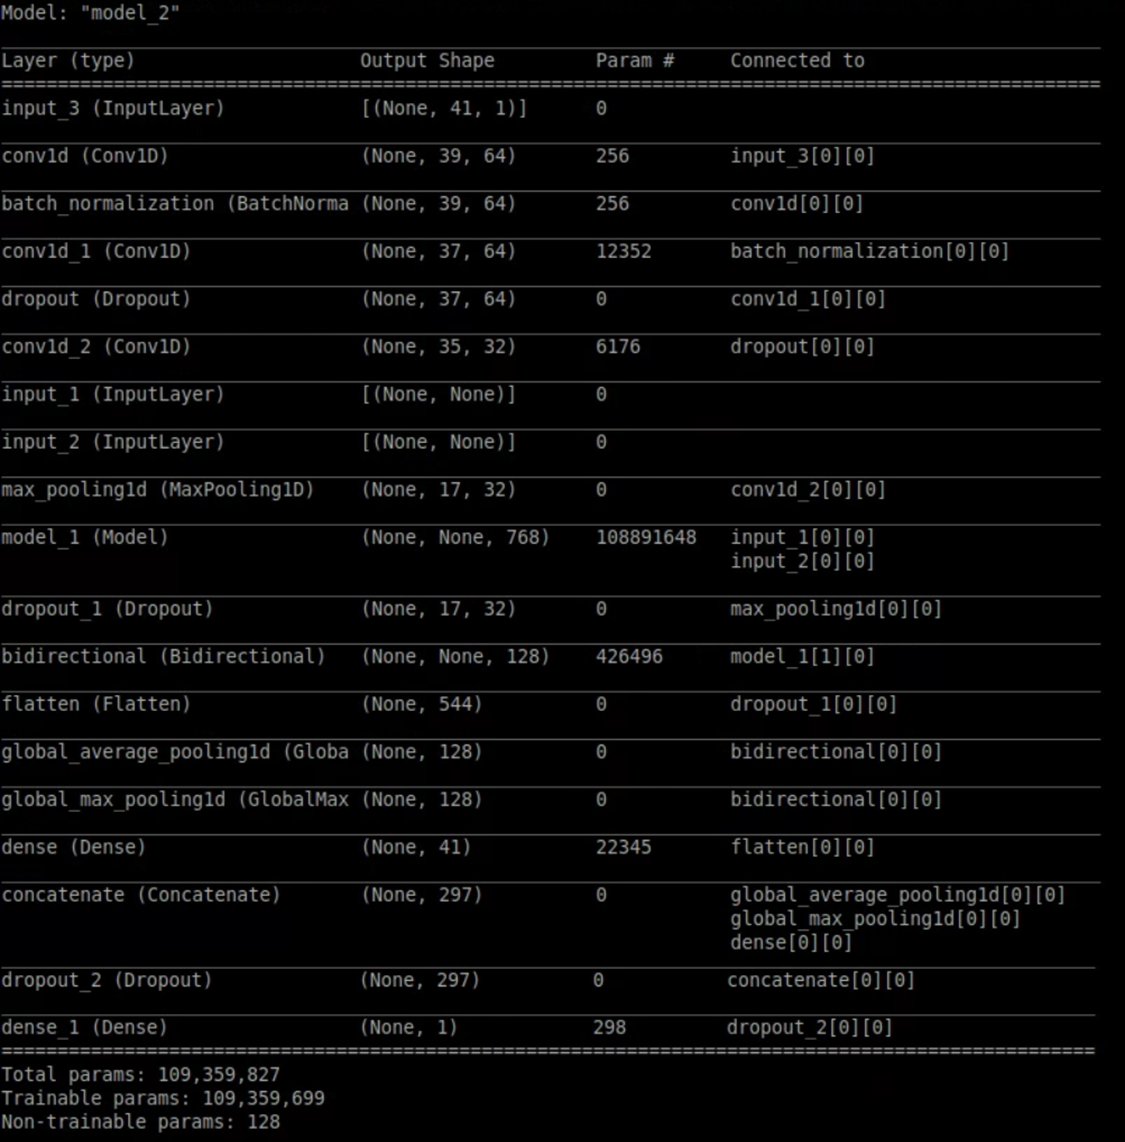

In [ ]:
# this is the result from the server
# __________________________________________________________________________________________________
# Epoch 1/10
# 2023-11-12 03:21:39.426849: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
# 2023-11-12 03:21:40.062328: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
# 33671/33671 [==============================] - ETA: 0s - loss: 0.6248 - f1_metric: 0.6349
# Epoch 00001: val_loss improved from inf to 0.51840, saving model to /home/310712009/Desktop/RSB_project/02_model_save/bert_amazon_1110_len70.h5
# 33671/33671 [==============================] - 21579s 641ms/step - loss: 0.6248 - f1_metric: 0.6349 - val_loss: 0.5184 - val_f1_metric: 0.7579 - lr: 5.0000e-05
# Epoch 2/10
# 33671/33671 [==============================] - ETA: 0s - loss: 0.5065 - f1_metric: 0.7468
# Epoch 00002: val_loss improved from 0.51840 to 0.45405, saving model to /home/310712009/Desktop/RSB_project/02_model_save/bert_amazon_1110_len70.h5
# 33671/33671 [==============================] - 21480s 638ms/step - loss: 0.5065 - f1_metric: 0.7468 - val_loss: 0.4541 - val_f1_metric: 0.7904 - lr: 5.0000e-05
# Epoch 3/10
# 33671/33671 [==============================] - ETA: 0s - loss: 0.4597 - f1_metric: 0.7774
# Epoch 00003: val_loss improved from 0.45405 to 0.42081, saving model to /home/310712009/Desktop/RSB_project/02_model_save/bert_amazon_1110_len70.h5
# 33671/33671 [==============================] - 21505s 639ms/step - loss: 0.4597 - f1_metric: 0.7774 - val_loss: 0.4208 - val_f1_metric: 0.8089 - lr: 5.0000e-05
# Epoch 4/10
# 33671/33671 [==============================] - ETA: 0s - loss: 0.4309 - f1_metric: 0.7941
# Epoch 00004: val_loss improved from 0.42081 to 0.39093, saving model to /home/310712009/Desktop/RSB_project/02_model_save/bert_amazon_1110_len70.h5
# 33671/33671 [==============================] - 21470s 638ms/step - loss: 0.4309 - f1_metric: 0.7941 - val_loss: 0.3909 - val_f1_metric: 0.8174 - lr: 5.0000e-05
# Epoch 5/10
# 33671/33671 [==============================] - ETA: 0s - loss: 0.4085 - f1_metric: 0.8075
# Epoch 00005: val_loss improved from 0.39093 to 0.37281, saving model to /home/310712009/Desktop/RSB_project/02_model_save/bert_amazon_1110_len70.h5
# 33671/33671 [==============================] - 21503s 639ms/step - loss: 0.4085 - f1_metric: 0.8075 - val_loss: 0.3728 - val_f1_metric: 0.8306 - lr: 5.0000e-05
# Epoch 6/10
# 33671/33671 [==============================] - ETA: 0s - loss: 0.3905 - f1_metric: 0.8178
# Epoch 00006: val_loss improved from 0.37281 to 0.35850, saving model to /home/310712009/Desktop/RSB_project/02_model_save/bert_amazon_1110_len70.h5
# 33671/33671 [==============================] - 21458s 637ms/step - loss: 0.3905 - f1_metric: 0.8178 - val_loss: 0.3585 - val_f1_metric: 0.8393 - lr: 5.0000e-05
# Epoch 7/10
# 33670/33671 [============================>.] - ETA: 0s - loss: 0.3757 - f1_metric: 0.8259/home/310712009/miniconda3/envs/tf2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
#   average, "true nor predicted", 'F-score is', len(true_sum)
# 33671/33671 [==============================] - ETA: 0s - loss: 0.3757 - f1_metric: 0.8259
# Epoch 00007: val_loss improved from 0.35850 to 0.34499, saving model to /home/310712009/Desktop/RSB_project/02_model_save/bert_amazon_1110_len70.h5
# 33671/33671 [==============================] - 21448s 637ms/step - loss: 0.3757 - f1_metric: 0.8259 - val_loss: 0.3450 - val_f1_metric: 0.8391 - lr: 5.0000e-05
# Epoch 8/10
# 33671/33671 [==============================] - ETA: 0s - loss: 0.3631 - f1_metric: 0.8326
# Epoch 00008: val_loss improved from 0.34499 to 0.33797, saving model to /home/310712009/Desktop/RSB_project/02_model_save/bert_amazon_1110_len70.h5
# 33671/33671 [==============================] - 21436s 637ms/step - loss: 0.3631 - f1_metric: 0.8326 - val_loss: 0.3380 - val_f1_metric: 0.8522 - lr: 5.0000e-05
# Epoch 9/10
# 33671/33671 [==============================] - ETA: 0s - loss: 0.3525 - f1_metric: 0.8384
# Epoch 00009: val_loss improved from 0.33797 to 0.33441, saving model to /home/310712009/Desktop/RSB_project/02_model_save/bert_amazon_1110_len70.h5
# 33671/33671 [==============================] - 21428s 636ms/step - loss: 0.3525 - f1_metric: 0.8384 - val_loss: 0.3344 - val_f1_metric: 0.8404 - lr: 5.0000e-05
# Epoch 10/10
# 33671/33671 [==============================] - ETA: 0s - loss: 0.3429 - f1_metric: 0.8435
# Epoch 00010: val_loss improved from 0.33441 to 0.32544, saving model to /home/310712009/Desktop/RSB_project/02_model_save/bert_amazon_1110_len70.h5
# 33671/33671 [==============================] - 21573s 641ms/step - loss: 0.3429 - f1_metric: 0.8435 - val_loss: 0.3254 - val_f1_metric: 0.8602 - lr: 5.0000e-05


In [ ]:
# Epoch 16/35
# 2023-11-21 04:31:05.446439: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
# 2023-11-21 04:31:06.010764: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
# 16836/16836 [==============================] - ETA: 0s - loss: 0.4551 - f1_metric: 0.7851
# Epoch 00016: val_loss improved from inf to 0.43488, saving model to bert_amazon_1120_en65_lem.h5
# 16836/16836 [==============================] - 17571s 1s/step - loss: 0.4551 - f1_metric: 0.7851 - val_loss: 0.4349 - val_f1_metric: 0.7903 - lr: 0.0050
# Epoch 17/35
# 16836/16836 [==============================] - ETA: 0s - loss: 0.4475 - f1_metric: 0.7892
# Epoch 00017: val_loss improved from 0.43488 to 0.43303, saving model to bert_amazon_1120_en65_lem.h5
# 16836/16836 [==============================] - 17575s 1s/step - loss: 0.4475 - f1_metric: 0.7892 - val_loss: 0.4330 - val_f1_metric: 0.7959 - lr: 0.0050
# Epoch 18/35
# 16836/16836 [==============================] - ETA: 0s - loss: 0.3516 - f1_metric: 0.8409
# Epoch 00018: val_loss improved from 0.43303 to 0.35374, saving model to bert_amazon_1120_en65_lem.h5
# 16836/16836 [==============================] - 17608s 1s/step - loss: 0.3516 - f1_metric: 0.8409 - val_loss: 0.3537 - val_f1_metric: 0.8581 - lr: 0.0050
# Epoch 19/35
# 16836/16836 [==============================] - ETA: 0s - loss: 0.2775 - f1_metric: 0.8812
# Epoch 00019: val_loss improved from 0.35374 to 0.27478, saving model to bert_amazon_1120_en65_lem.h5
# 16836/16836 [==============================] - 17592s 1s/step - loss: 0.2775 - f1_metric: 0.8812 - val_loss: 0.2748 - val_f1_metric: 0.8778 - lr: 0.0050
# Epoch 20/35
# 16836/16836 [==============================] - ETA: 0s - loss: 0.2521 - f1_metric: 0.8937
# Epoch 00020: val_loss improved from 0.27478 to 0.24528, saving model to bert_amazon_1120_en65_lem.h5
# 16836/16836 [==============================] - 17585s 1s/step - loss: 0.2521 - f1_metric: 0.8937 - val_loss: 0.2453 - val_f1_metric: 0.8993 - lr: 0.0050
# Epoch 21/35
# 16836/16836 [==============================] - ETA: 0s - loss: 0.2354 - f1_metric: 0.9019
# Epoch 00021: val_loss improved from 0.24528 to 0.23973, saving model to bert_amazon_1120_en65_lem.h5
# 16836/16836 [==============================] - 17599s 1s/step - loss: 0.2354 - f1_metric: 0.9019 - val_loss: 0.2397 - val_f1_metric: 0.8996 - lr: 0.0050
# Epoch 22/35
# 16836/16836 [==============================] - ETA: 0s - loss: 0.2222 - f1_metric: 0.9084
# Epoch 00022: val_loss improved from 0.23973 to 0.23163, saving model to bert_amazon_1120_en65_lem.h5
# 16836/16836 [==============================] - 17691s 1s/step - loss: 0.2222 - f1_metric: 0.9084 - val_loss: 0.2316 - val_f1_metric: 0.9059 - lr: 0.0050
# Epoch 23/35
# 16836/16836 [==============================] - ETA: 0s - loss: 0.2105 - f1_metric: 0.9140
# Epoch 00023: val_loss improved from 0.23163 to 0.22935, saving model to bert_amazon_1120_en65_lem.h5
# 16836/16836 [==============================] - 17660s 1s/step - loss: 0.2105 - f1_metric: 0.9140 - val_loss: 0.2293 - val_f1_metric: 0.9025 - lr: 0.0050
# Epoch 24/35
# 16836/16836 [==============================] - ETA: 0s - loss: 0.2020 - f1_metric: 0.9178
# Epoch 00024: val_loss improved from 0.22935 to 0.22425, saving model to bert_amazon_1120_en65_lem.h5
# 16836/16836 [==============================] - 17640s 1s/step - loss: 0.2020 - f1_metric: 0.9178 - val_loss: 0.2243 - val_f1_metric: 0.9083 - lr: 0.0050
# Epoch 25/35
# 16836/16836 [==============================] - ETA: 0s - loss: 0.1910 - f1_metric: 0.9232
# Epoch 00025: val_loss did not improve from 0.22425
# 16836/16836 [==============================] - 17681s 1s/step - loss: 0.1910 - f1_metric: 0.9232 - val_loss: 0.2450 - val_f1_metric: 0.9054 - lr: 0.0050
# Epoch 26/35
# 16836/16836 [==============================] - ETA: 0s - loss: 0.1820 - f1_metric: 0.9268
# Epoch 00026: val_loss did not improve from 0.22425
# 16836/16836 [==============================] - 17629s 1s/step - loss: 0.1820 - f1_metric: 0.9268 - val_loss: 0.2276 - val_f1_metric: 0.9077 - lr: 0.0050
# Epoch 27/35
# 16836/16836 [==============================] - ETA: 0s - loss: 0.1729 - f1_metric: 0.9313
# Epoch 00027: val_loss did not improve from 0.22425

# Epoch 00027: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
# 16836/16836 [==============================] - 17673s 1s/step - loss: 0.1729 - f1_metric: 0.9313 - val_loss: 0.2260 - val_f1_metric: 0.9073 - lr: 0.0050
# Epoch 28/35
# 16836/16836 [==============================] - ETA: 0s - loss: 0.1350 - f1_metric: 0.9485
# Epoch 00028: val_loss did not improve from 0.22425
# 16836/16836 [==============================] - 17610s 1s/step - loss: 0.1350 - f1_metric: 0.9485 - val_loss: 0.2426 - val_f1_metric: 0.9097 - lr: 5.0000e-04
# Epoch 29/35
# 16836/16836 [==============================] - ETA: 0s - loss: 0.1248 - f1_metric: 0.9529
# Epoch 00029: val_loss did not improve from 0.22425
# 16836/16836 [==============================] - 17589s 1s/step - loss: 0.1248 - f1_metric: 0.9529 - val_loss: 0.2519 - val_f1_metric: 0.9095 - lr: 5.0000e-04
# Epoch 00029: early stopping
#     Epoch      loss  f1_metric  val_loss  val_f1_metric
# 0       1  0.455146   0.785135  0.434877       0.790262
# 1       2  0.447547   0.789249  0.433034       0.795887
# 2       3  0.351566   0.840912  0.353736       0.858082
# 3       4  0.277525   0.881155  0.274777       0.877780
# 4       5  0.252079   0.893710  0.245284       0.899306
# 5       6  0.235416   0.901861  0.239730       0.899571
# 6       7  0.222235   0.908355  0.231632       0.905913
# 7       8  0.210546   0.913998  0.229346       0.902496
# 8       9  0.202008   0.917806  0.224254       0.908342
# 9      10  0.190968   0.923190  0.244970       0.905368
# 10     11  0.182029   0.926816  0.227593       0.907702
# 11     12  0.172916   0.931266  0.225999       0.907343
# 12     13  0.134986   0.948480  0.242605       0.909681
# 13     14  0.124801   0.952877  0.251882       0.909479
# 14     15,0.17432555556297302,0.9306665658950806,0.22604897618293762,0.9101492166519165
# 16     16,0.16870570182800293,0.9333879947662354,0.22554124891757965,0.9102879762649536
# 17     17,0.16617454588413239,0.9345317482948303,0.22619986534118652,0.9097577333450317
# 18     18,0.16402418911457062,0.9356391429901123,0.2270783632993698,0.9096541404724121
# 19     19,0.16216616332530975,0.93617844581604,0.22735078632831573,0.9098970293998718
# 20     20,0.16220419108867645,0.9362850189208984,0.22778169810771942,0.9099456071853638
# 21     21,0.16187217831611633,0.9366142749786377,0.22776196897029877,0.9099600315093994


#**11. Evaluation for Training and Validation set**

In [ ]:
def plot_and_save_model_metrics(history_model, path_save, filename):
    # Plot and save Model accuracy
    plt.plot(history_model.history['f1_metric'])
    plt.plot(history_model.history['val_f1_metric'])
    plt.title('Model accuracy (f1_metric)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.savefig(f'{path_save}{filename}_accuracy.png')
    plt.show()
    plt.clf()

    # Plot and save Model loss
    plt.plot(history_model.history['loss'])
    plt.plot(history_model.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.savefig(f'{path_save}{filename}_loss.png')
    plt.show()

history_model = bert_model_his
plot_and_save_model_metrics(history_model, path_save_result, filename_modelsave)

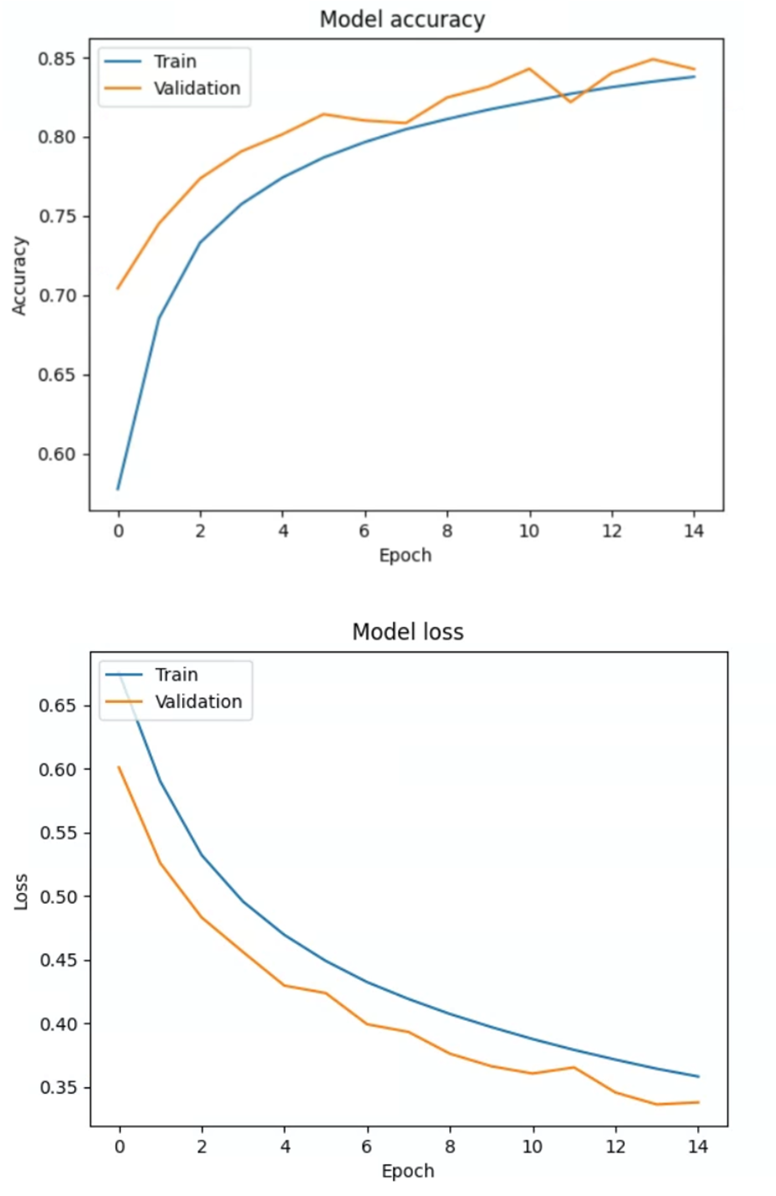

#**12. Evaluation and Result**



## 12.1 Loading the test token data


In [ ]:
# read testing data
path_n = '/content/drive/MyDrive/03_Rennes_School_of_Business/00_fil_rouge_project/01_fil_rouge_project_files/01_Dataset/01_P14_Amazon Reviews for Sentiment Analysis/'
path_test_c = path_n + 'df_amazon_test_clean_en_lem_1115.csv'

# Save token data
path_token = '/content/drive/MyDrive/03_Rennes_School_of_Business/00_fil_rouge_project/01_fil_rouge_project_files/Nick/token_data/'
filename_token = 'bert_amazon_1115_en65_lem_'

In [ ]:
df_test = pd.read_csv(path_test_c)

In [ ]:
print(path_token + filename_token)

'/content/drive/MyDrive/03_Rennes_School_of_Business/00_fil_rouge_project/01_fil_rouge_project_files/Nick/token_data/bert_amazon_1115_en65_lem_'

In [ ]:
#loading the token data


# Read X1.csv and convert it back to a NumPy array with dtype=int32
print('Read Xtest1.csv now')
Xtest1 = np.genfromtxt(path_token + filename_token + 'Xtest1.csv', delimiter=',', dtype=np.int32, skip_header=1)  # skip the header row

# Read X2.csv and convert it back to a NumPy array with dtype=int32
print('Read Xtest2.csv now')
Xtest2 = np.genfromtxt(path_token + filename_token + 'Xtest2.csv', delimiter=',', dtype=np.int32, skip_header=1)  # skip the header row

print([Xtest1, Xtest2])

print(Xtest1.dtype)
print(Xtest2.dtype)

Read Xtest1.csv now
Read Xtest2.csv now
[array([[ 101, 1379, 2800, ..., 2358, 2003, 7024],
       [ 101, 1100, 1276, ..., 6766, 2310, 1188],
       [ 101, 5117, 2351, ...,    0,    0,    0],
       ...,
       [ 101, 8431, 4036, ...,    0,    0,    0],
       [ 101, 3509, 7269, ...,    0,    0,    0],
       [ 101, 3109, 2567, ..., 5812, 3799, 3913]], dtype=int32), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)]
int32
int32


In [ ]:
print('Read Xtest3.csv now')
Xtest3 = df_test.iloc[:, 2:43].to_numpy()
print(Xtest3)
print(Xtest3.dtype)

Read Xtest3.csv now
[[60  2  2 ...  0  0  0]
 [82  1  0 ...  0  0  2]
 [31  0  0 ...  0  0  1]
 ...
 [50  0  1 ...  0  1  1]
 [20  0  0 ...  0  1  0]
 [72  0  0 ...  0  0  1]]
int64


## 12.2 Prediction

In [ ]:
from keras.models import load_model
from keras_bert import get_custom_objects
from sklearn.metrics import f1_score

# Define your custom metric function
def f1_metric(y_true, y_pred):
    return tf.py_function(f1_score, (y_true, tf.round(y_pred)), tf.float64)

# Create a custom_objects dictionary
custom_objects = get_custom_objects()
my_objects = {'f1_metric': f1_metric}
custom_objects.update(my_objects)


# Load the model with custom_objects
path_save = '/content/drive/MyDrive/03_Rennes_School_of_Business/00_fil_rouge_project/01_fil_rouge_project_files/02_model_save/'

filename_model = 'bert_amazon_1123_en65_lem_09106'

model_test = load_model(path_save + filename_model + '.h5', custom_objects=custom_objects)

In [ ]:
test_pred = model_test.predict([Xtest1,Xtest2, Xtest3], verbose = 1) #,verbose = 1
print(test_pred)

12469/12469 [==============================] - 2195s 175ms/step
[[0.04056472]
 [0.00796618]
 [0.90103704]
 ...
 [0.94347   ]
 [0.07468239]
 [0.93096155]]


## 12.3 Result

In [ ]:
df_test.rename(columns={'data_label': 'Label'}, inplace=True)
# data_label comments
result = pd.DataFrame()
result['comments'] = df_test['comments']
result['data_label'] = df_test['Label']
result['Label_pred'] = test_pred.round().astype(int).reshape(-1)

path_save = '/content/drive/MyDrive/03_Rennes_School_of_Business/00_fil_rouge_project/01_fil_rouge_project_files/Nick/02_result_save/'
filename_result = '_test_result_1115'

result.to_csv(path_save + filename_model + filename_result + '.csv', index = False)
result

comments  data_label  \
0       great cd lovely pat one great voice generation...           0   
1       one good game music soundtrack game do not rea...           0   
2       battery die within year buy charger jul   work...           1   
3       work fine maha energy well check maha energys ...           0   
4       great nonaudiophile review quite bit combo pla...           0   
...                                                   ...         ...   
398999  unbelievable bad way buy thomas son huge thoma...           1   
399000  almost great broke son recieve birthday gift  ...           1   
399001  disappointed buy toy son love thomas toy need ...           1   
399002  classic jessica mitford compilation wide range...           0   
399003  comedy scene hear dvd disappointment get hope ...           1   

        Label_pred  
0                0  
1                0  
2                1  
3                0  
4                0  
...            ...  
398999           1  
399000           1  
399001           1  
399002           0  
399003           1  

[399004 rows x 3 columns]

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("Accuracy is", end = ' ')
print(accuracy_score(df_test['Label'], result['Label_pred']).round(4))

Accuracy is 0.9113


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(df_test['Label'], result['Label_pred']))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91    199344
           1       0.91      0.91      0.91    199660

    accuracy                           0.91    399004
   macro avg       0.91      0.91      0.91    399004
weighted avg       0.91      0.91      0.91    399004



In [ ]:
# Check Accuracy

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
cm = confusion_matrix(df_test['Label'], result['Label_pred'])
cm

array([[181234,  18110],
       [ 17297, 182363]])

## 12.4 Visulization

#### 12.4.1 Confusion Matrix

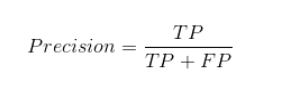

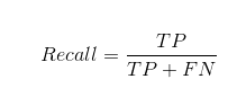

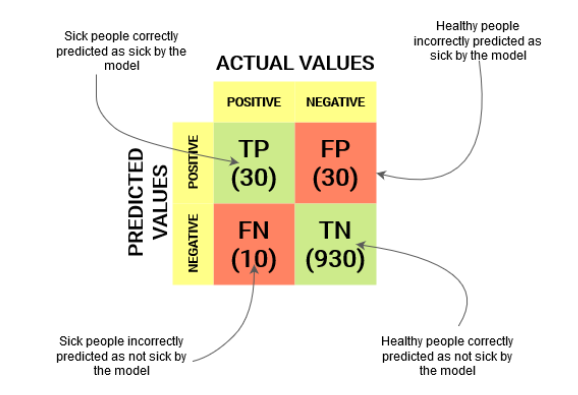

<Axes: >

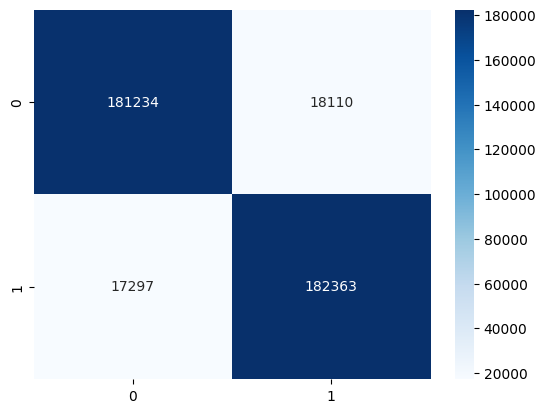

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g') #cmap="YlGnBu"

<Axes: xlabel='Label', ylabel='count'>

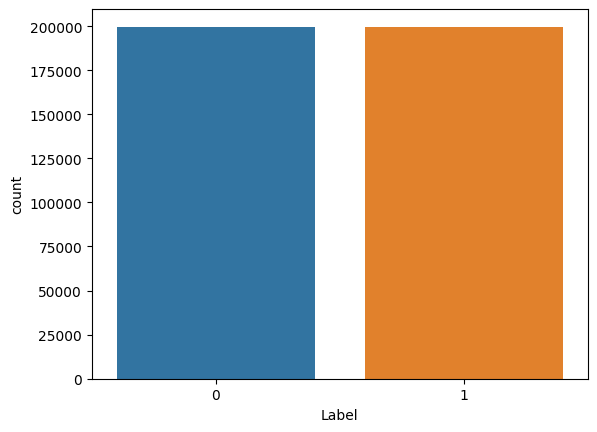

In [ ]:
#Visualize the distribution of target variable
import seaborn as sns
sns.countplot(x=df_test['Label'])

<Axes: xlabel='Label_pred', ylabel='count'>

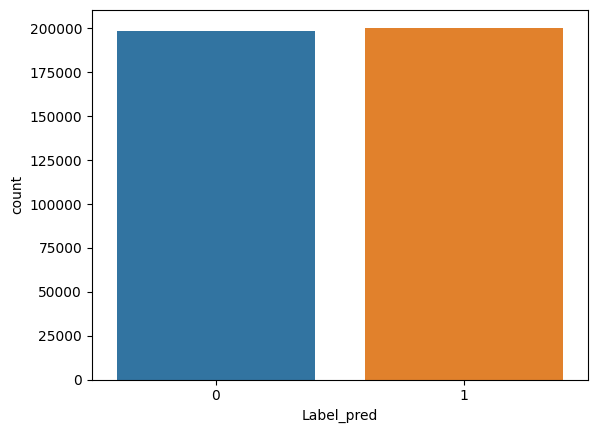

In [ ]:
sns.countplot(x=result['Label_pred'])

### 12.4.2 ROC
    As you can see, given the AUC metric, Keras classifier outperforms the other classifier.
    ROC, AUC for a categorical classifier
    ROC curve extends to problems with three or more classes with what is known as the one-vs-all approach.

In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = test_pred.ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(df_test['Label'], y_pred_keras)

In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

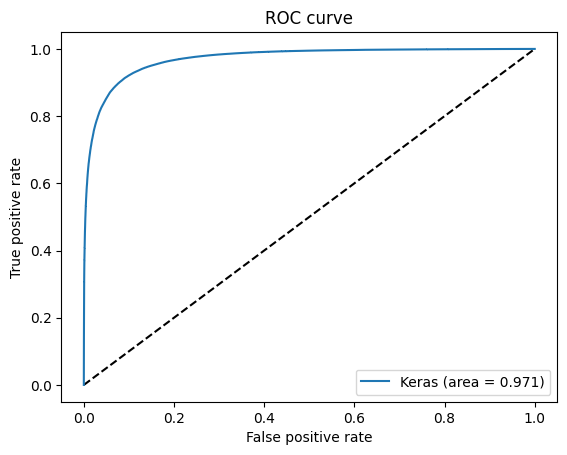

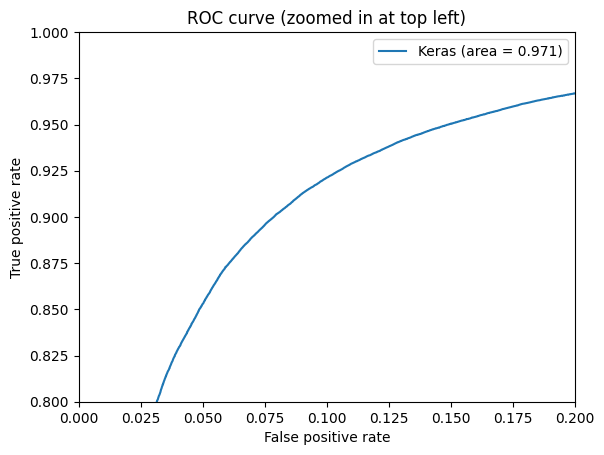

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(df_test['Label'], y_pred_keras)
print('AUC: %.3f' % auc)

AUC: 0.971
